In [1]:
from astropy.io import fits
from astropy import units, constants
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import corner
from voigt_fit_lib import *
import os
import pickle

Load in the files

In [2]:
rootdir = '/Users/thepoetoftwilight/Documents/CUBS/Data/PG1522+101/'

First, the FUV files

In [3]:
spec_fits_fuv = fits.open(rootdir + 'FUV/PG1522+101_FUV_wavecal_new.fits')
lsf_fits_fuv = fits.open(rootdir + 'FUV/PG1522_COS_FUV_wavcal2022_lsf_ZQ.fits')

Then, the NUV files

In [4]:
spec_fits_nuv = fits.open(rootdir + 'G185M/PG1522+101_NUV_wavecal_new.fits')
lsf_fits_nuv = fits.open(rootdir + 'G185M/PG1522_COS_NUV_wavcal2022_lsf.fits')

Then, the STIS files

In [5]:
spec_fits_stis = fits.open(rootdir + 'STIS/PG1522+101_E230M_new.fits')
lsf_fits_stis = fits.open(rootdir + 'STIS/PG1522_STIS_NUV_wavcal2022_lsf.fits')

Then, the HIRES files

In [6]:
spec_fits_hires = fits.open(rootdir + 'HIRES/PG1522+101_HIRES.fits')

Compile a list of the spectra, continuum nodes, and IDs for all detectors

In [7]:
spec_fits_list = [spec_fits_fuv, spec_fits_nuv, spec_fits_stis, spec_fits_hires]
lsf_fits_list = [lsf_fits_fuv, lsf_fits_nuv, lsf_fits_stis]

# HIRES: MW Ca H&K

## CaII 3969

In [8]:
caii_3969_hires = ion_transition('CaII', 3969, 'Ca', -1.3e-4, 'HIRES')

In [9]:
caii_3969_hires.grab_ion_transition_info()

In [10]:
caii_3969_hires.grab_ion_transition_spec(spec_fits_list, delta_wav=0)

In [11]:
caii_3969_hires.cont_norm_flux(renorm=False, v_abs_range=[-80,110], degree=1)

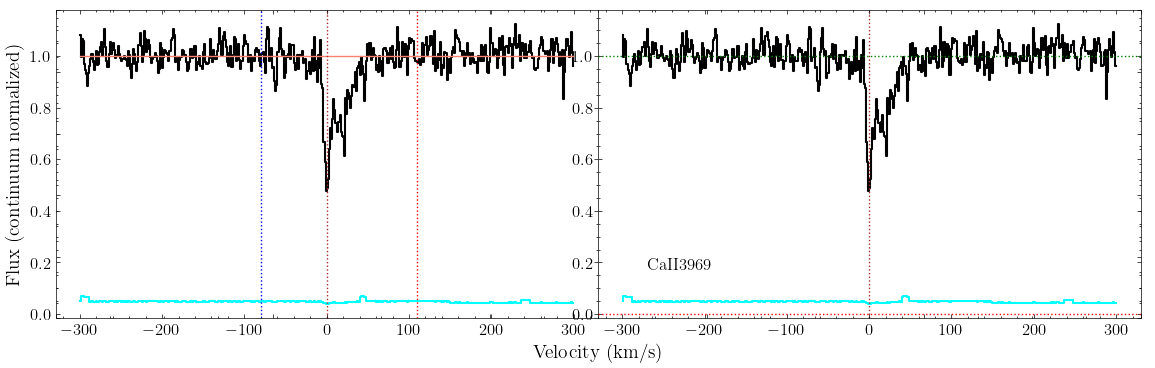

In [12]:
fig, axes = caii_3969_hires.plot_ion_transition_spec_cont()

In [13]:
np.mean(caii_3969_hires.v[1:]-caii_3969_hires.v[:-1])

1.2999973996744858

## CaII 3934

In [14]:
caii_3934_hires = ion_transition('CaII', 3934, 'Ca', -1.3e-4, 'HIRES')

In [15]:
caii_3934_hires.grab_ion_transition_info()

In [16]:
caii_3934_hires.grab_ion_transition_spec(spec_fits_list, delta_wav=0)

In [17]:
caii_3934_hires.cont_norm_flux(renorm=False, v_abs_range=[-80,110], degree=1)

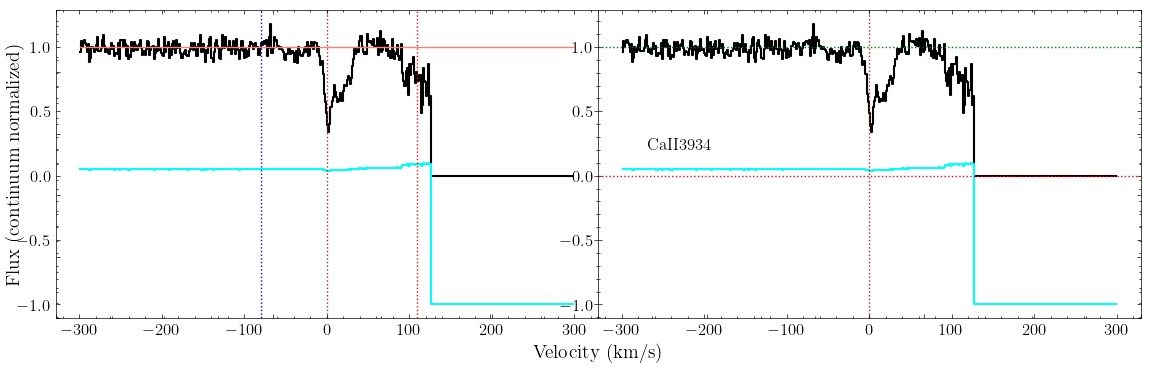

In [18]:
fig, axes = caii_3934_hires.plot_ion_transition_spec_cont()

# FUV: MW CII* 1335 and NI 1200

## CII* 1335

In [19]:
cii_1335_fuv = ion_transition('CII*', 1335, 'C', -1.3e-4, 'FUV')

In [20]:
cii_1335_fuv.grab_ion_transition_info(delta_v=6)

In [21]:
cii_1335_fuv.grab_ion_transition_spec(spec_fits_list, masks=[[-300,-180]], delta_wav=0)

In [22]:
cii_1335_fuv.cont_norm_flux(renorm=True, v_abs_range=[-50,70], degree=1)

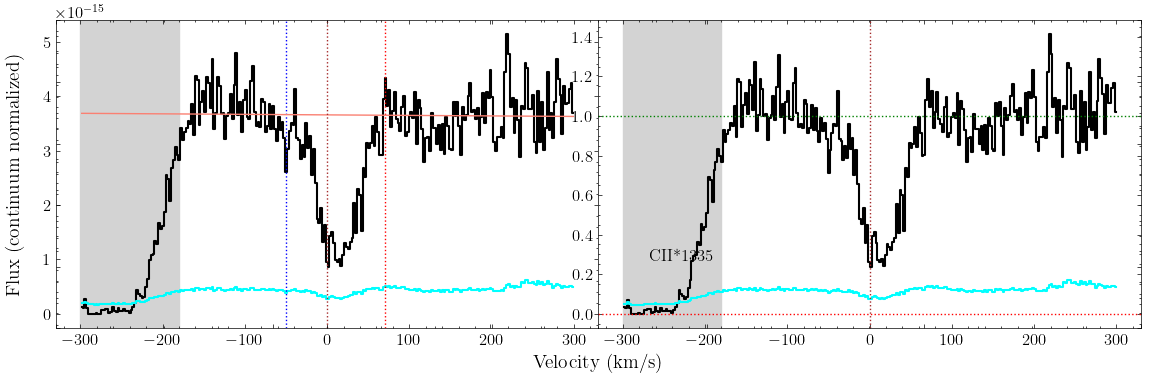

In [23]:
fig, axes = cii_1335_fuv.plot_ion_transition_spec_cont()

In [24]:
delta_wav_fuv_1 = cii_1335_fuv.wav0_obs*cii_1335_fuv.delta_v/3e+5

In [25]:
delta_wav_fuv_1

0.026709781276980003

## NI 1200

In [26]:
ni_1200_fuv = ion_transition('NI', 1200.71, 'N', -1.3e-4, 'FUV')

In [27]:
ni_1200_fuv.grab_ion_transition_info(delta_v=7)

In [28]:
ni_1200_fuv.grab_ion_transition_spec(spec_fits_list, masks=[[-300,-240],[-180,-70]], delta_wav=0)

In [29]:
ni_1200_fuv.cont_norm_flux(renorm=True, v_abs_range=[-40,70], degree=1)

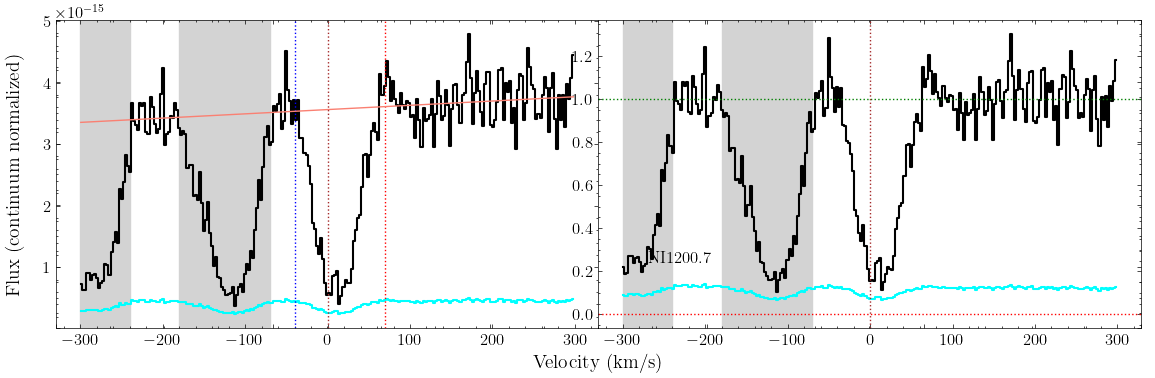

In [30]:
fig, axes = ni_1200_fuv.plot_ion_transition_spec_cont()

In [31]:
delta_wav_fuv_2 = ni_1200_fuv.wav0_obs*ni_1200_fuv.delta_v/3e+5

In [32]:
delta_wav_fuv_2

0.028012919846940005

# FUV wavelength offset

In [33]:
delta_wav_fuv = .5*(delta_wav_fuv_1 + delta_wav_fuv_2)

In [34]:
delta_wav_fuv_1, delta_wav_fuv_2, delta_wav_fuv

(0.026709781276980003, 0.028012919846940005, 0.027361350561960006)

# STIS: MW FeII 2344 and FeII 2586

## FeII 2344

In [35]:
feii_2344_stis = ion_transition('FeII', 2344, 'Fe', -1.3e-4, 'STIS')

In [36]:
feii_2344_stis.grab_ion_transition_info(delta_v=2)

In [37]:
feii_2344_stis.grab_ion_transition_spec(spec_fits_list, delta_wav=0)

In [38]:
feii_2344_stis.cont_norm_flux(renorm=True, v_abs_range=[-90,90], degree=1)

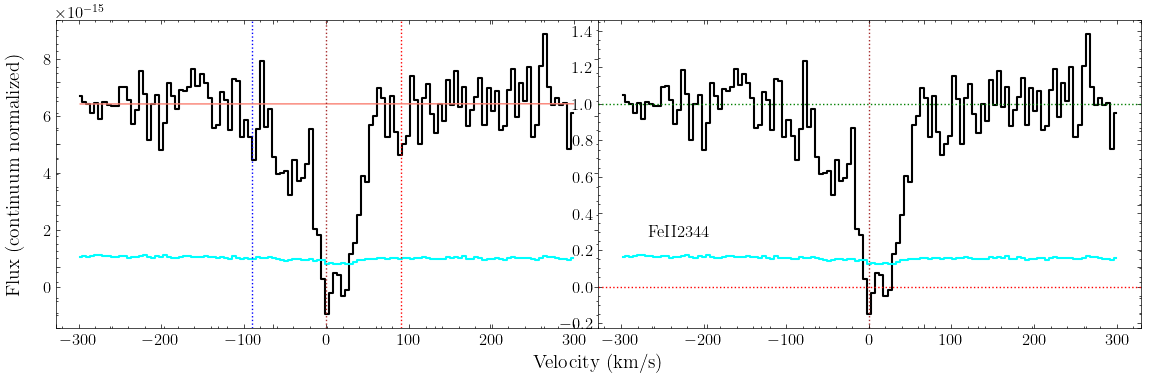

In [39]:
fig, axes = feii_2344_stis.plot_ion_transition_spec_cont()

In [40]:
delta_wav_stis_1 = feii_2344_stis.wav0_obs*feii_2344_stis.delta_v/3e+5

In [41]:
delta_wav_stis_1

0.01562605474943458

In [42]:
np.mean(feii_2344_stis.v[1:]-feii_2344_stis.v[:-1])

4.89309079697569

In [43]:
feii_2344_stis.wav

array([2341.59449153, 2341.63275918, 2341.67102665, 2341.70929393,
       2341.74756102, 2341.78582792, 2341.82409464, 2341.86236117,
       2341.90062751, 2341.93889366, 2341.97715963, 2342.01542541,
       2342.053691  , 2342.0919564 , 2342.13022162, 2342.16848665,
       2342.20675149, 2342.24501614, 2342.28328061, 2342.32154489,
       2342.35980898, 2342.39807289, 2342.4363366 , 2342.47460013,
       2342.51286348, 2342.55112663, 2342.5893896 , 2342.62765238,
       2342.66591497, 2342.70417738, 2342.74243959, 2342.78070163,
       2342.81896347, 2342.85722512, 2342.89548659, 2342.93374787,
       2342.97200897, 2343.01026987, 2343.04853059, 2343.08679112,
       2343.12505147, 2343.16331163, 2343.2015716 , 2343.23983138,
       2343.27809097, 2343.31635038, 2343.3546096 , 2343.39286863,
       2343.43112748, 2343.46938614, 2343.50764461, 2343.54590289,
       2343.58416099, 2343.6224189 , 2343.66067662, 2343.69893415,
       2343.7371915 , 2343.77544866, 2343.81370563, 2343.85196

## FeII 2586

In [44]:
feii_2586_stis = ion_transition('FeII', 2586, 'Fe', -1.3e-4, 'STIS')

In [45]:
feii_2586_stis.grab_ion_transition_info(delta_v=2)

In [46]:
feii_2586_stis.grab_ion_transition_spec(spec_fits_list, delta_wav=0)

In [47]:
feii_2586_stis.cont_norm_flux(renorm=True, v_abs_range=[-90,90], degree=1)

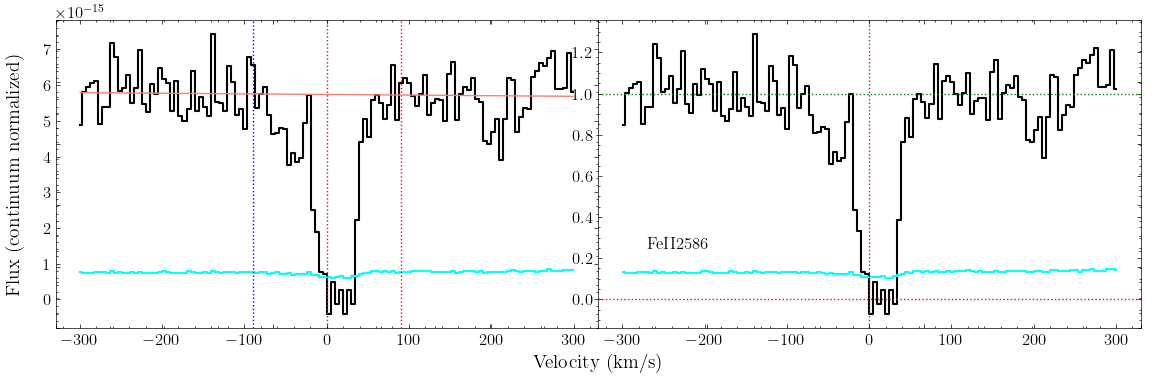

In [48]:
fig, axes = feii_2586_stis.plot_ion_transition_spec_cont()

In [49]:
delta_wav_stis_2 = feii_2586_stis.wav0_obs*feii_2586_stis.delta_v/3e+5

In [50]:
delta_wav_stis_2

0.01724208867637622

# STIS wavelength offset

In [51]:
delta_wav_stis = .5*(delta_wav_stis_1 + delta_wav_stis_2)

In [52]:
delta_wav_stis_1, delta_wav_stis_2, delta_wav_stis

(0.01562605474943458, 0.01724208867637622, 0.016434071712905403)

# MW summary

In [53]:
summary_mw = ion(-1.3e-4, 'MW Summary', [caii_3969_hires, caii_3934_hires, 
                                   cii_1335_fuv, ni_1200_fuv, feii_2344_stis, feii_2586_stis])

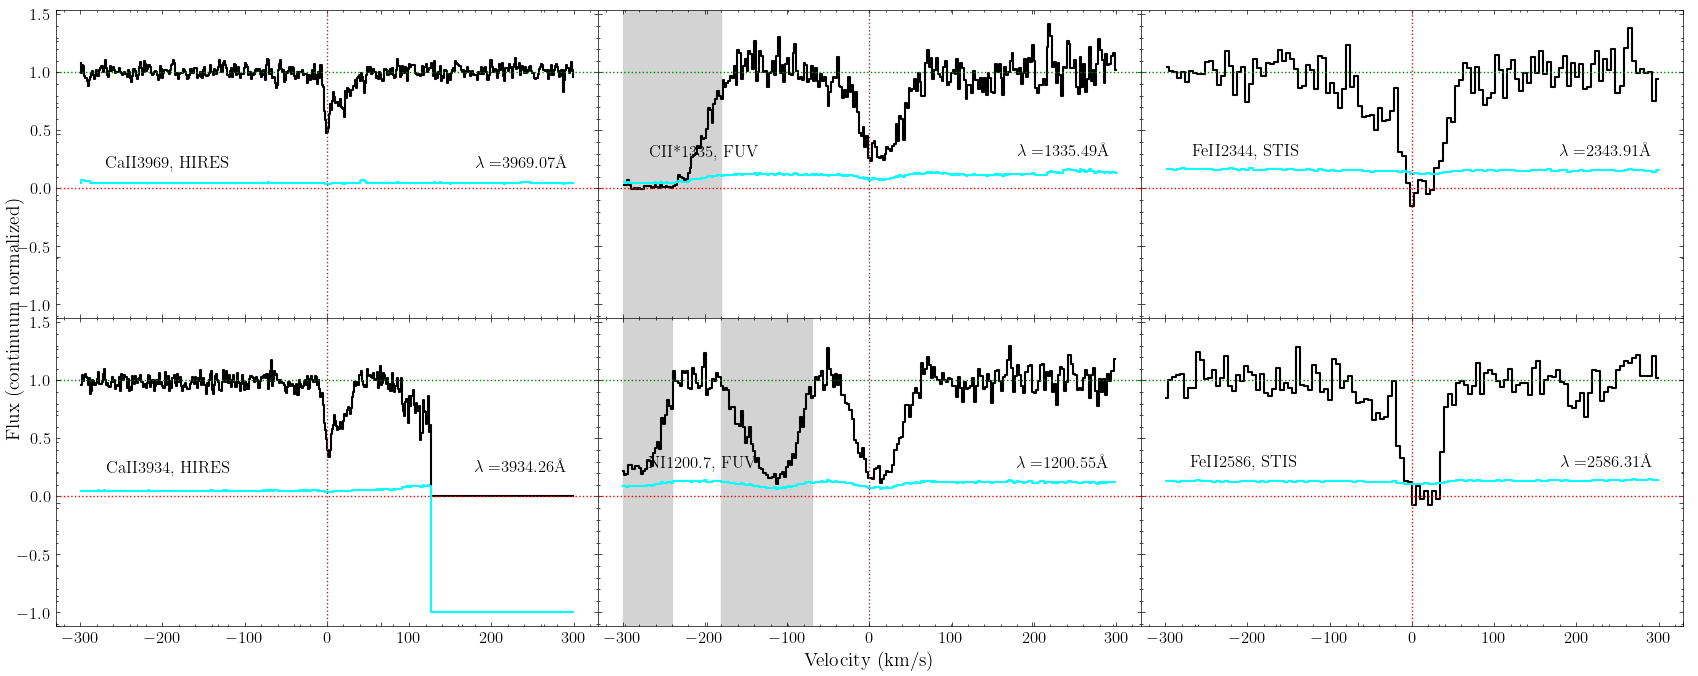

In [54]:
fig, axes = summary_mw.plot_ion(n_cols=3)

# z=1.1659 HI

In [55]:
z_sys = 1.165909

## HI 1215 (STIS)

In [56]:
hi_1215_stis = ion_transition('HI', 1215, 'H', z_sys, 'STIS')

In [57]:
hi_1215_stis.grab_ion_transition_info()

In [58]:
hi_1215_stis.grab_ion_transition_spec(spec_fits_list)

In [59]:
hi_1215_stis.cont_norm_flux(renorm=True, v_abs_range=[-100,120], degree=1)

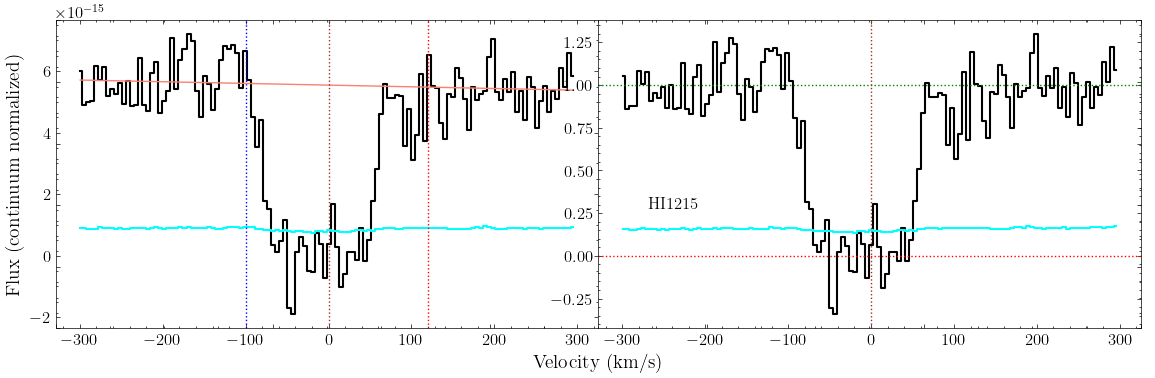

In [60]:
fig, axes = hi_1215_stis.plot_ion_transition_spec_cont()

In [61]:
hi_1215_stis.grab_ion_transition_lsf(lsf_fits_list)

In [62]:
hi_1215_stis.init_ion_transition(init_values = np.array([[16.52,21, 5],[14.69,29,-27]]), 
                             lsf_convolve = True)

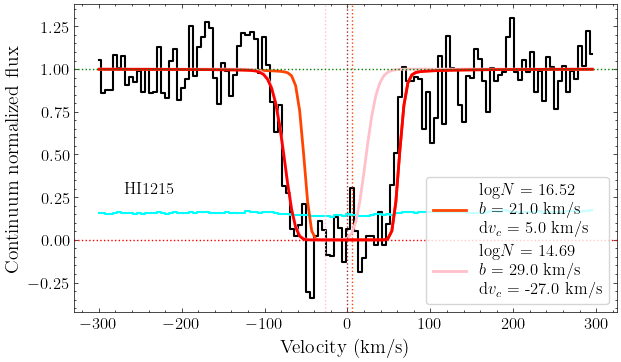

In [63]:
fig, ax = hi_1215_stis.plot_ion_transition_init_fit()

In [64]:
hi_1215_stis.fit_ion_transition()

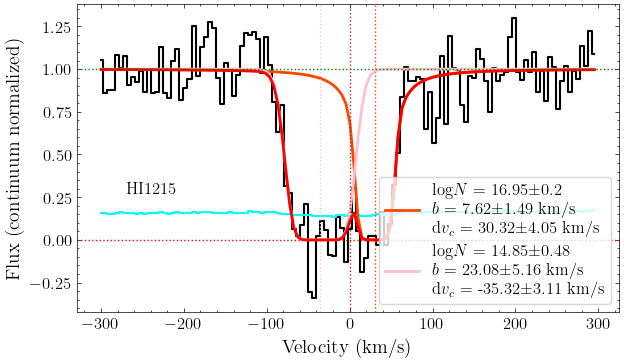

In [65]:
fig, ax = hi_1215_stis.plot_ion_transition_best_fit()

## HI 1025 (STIS)

In [66]:
hi_1025_stis = ion_transition('HI', 1025, 'H', z_sys, 'STIS')

In [67]:
hi_1025_stis.grab_ion_transition_info()

In [68]:
hi_1025_stis.grab_ion_transition_spec(spec_fits_list)

In [69]:
hi_1025_stis.cont_norm_flux(renorm=True, v_abs_range=[-100,90], degree=1)

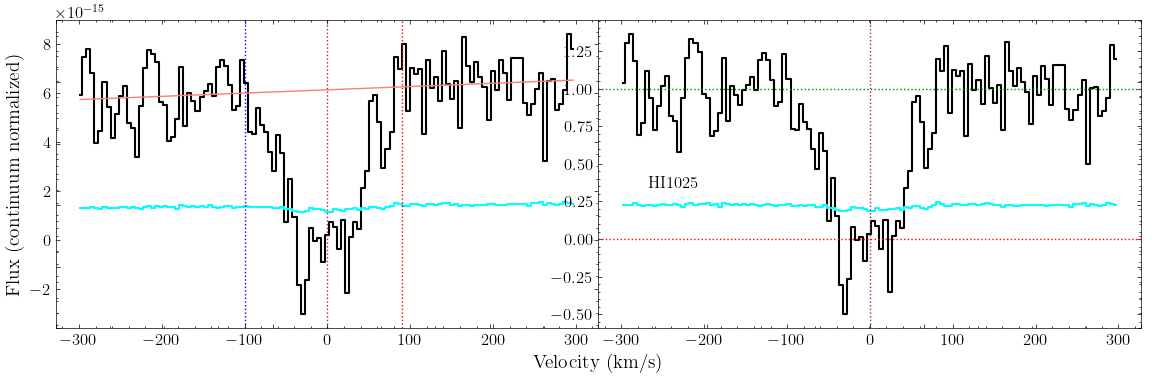

In [70]:
fig, axes = hi_1025_stis.plot_ion_transition_spec_cont()

In [71]:
hi_1025_stis.grab_ion_transition_lsf(lsf_fits_list)

In [72]:
hi_1025_stis.init_ion_transition(init_values = np.array([[16.52,21, 5],[14.69,29,-27]]), 
                             lsf_convolve = True)

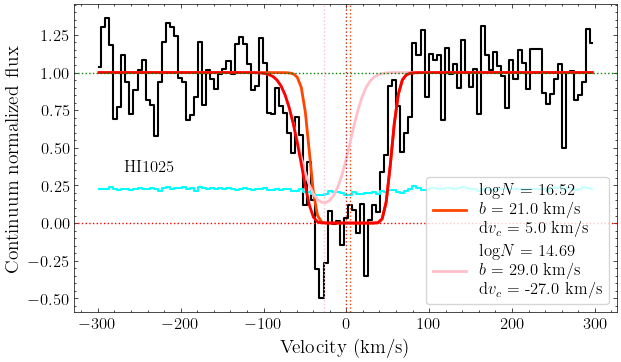

In [73]:
fig, ax = hi_1025_stis.plot_ion_transition_init_fit()

In [74]:
hi_1025_stis.fit_ion_transition()

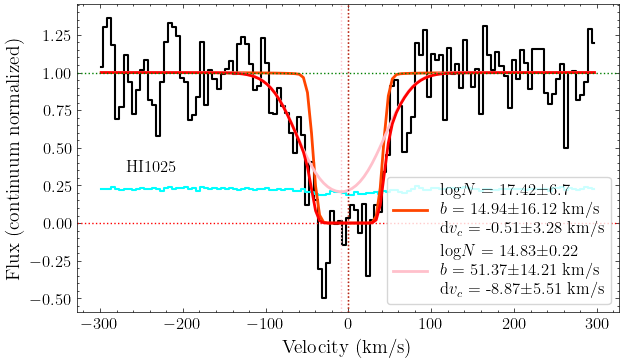

In [75]:
fig, ax = hi_1025_stis.plot_ion_transition_best_fit()

## HI 972 (STIS)

In [76]:
hi_972_stis = ion_transition('HI', 972, 'H', z_sys, 'STIS')

In [77]:
hi_972_stis.grab_ion_transition_info()

In [78]:
hi_972_stis.grab_ion_transition_spec(spec_fits_list)

In [79]:
hi_972_stis.cont_norm_flux(renorm=True, v_abs_range=[-80,80], degree=1)

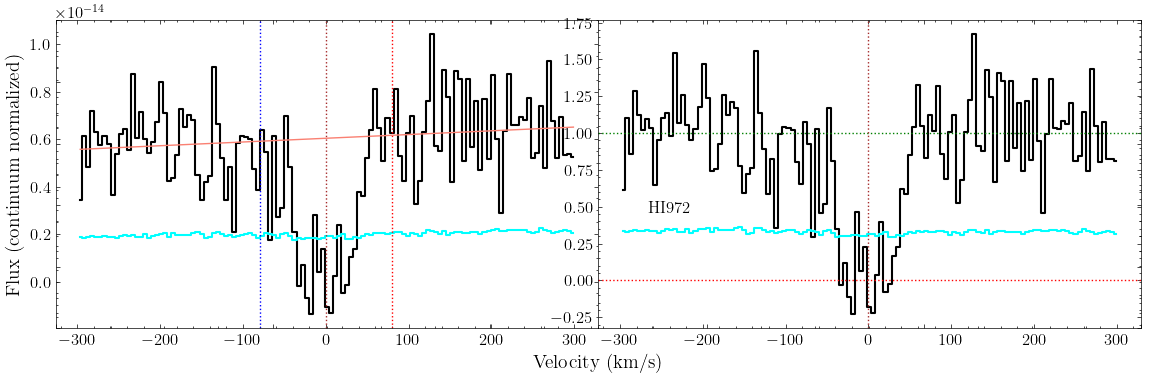

In [80]:
fig, axes = hi_972_stis.plot_ion_transition_spec_cont()

In [81]:
hi_972_stis.grab_ion_transition_lsf(lsf_fits_list)

In [82]:
hi_972_stis.init_ion_transition(init_values = np.array([[16.52,21, 5],[14.69,29,-27]]), 
                             lsf_convolve = True)

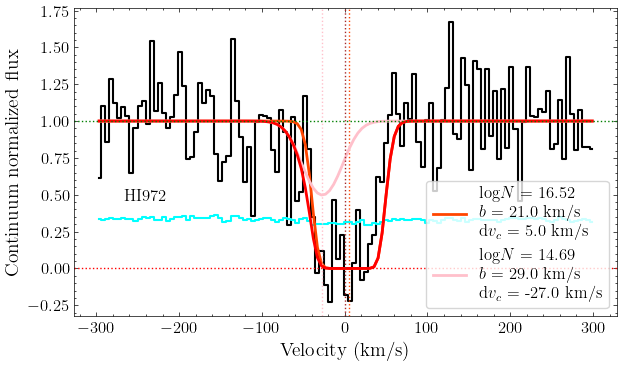

In [83]:
fig, ax = hi_972_stis.plot_ion_transition_init_fit()

In [84]:
hi_972_stis.fit_ion_transition()

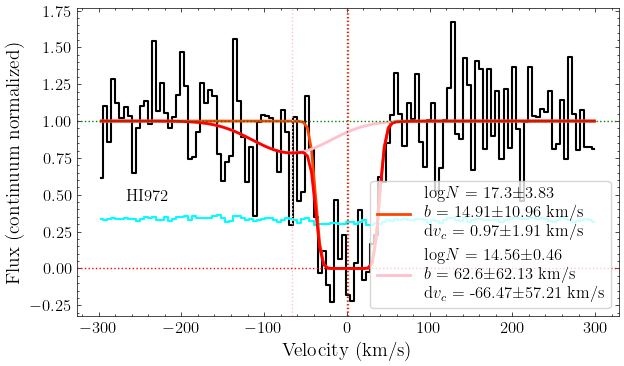

In [85]:
fig, ax = hi_972_stis.plot_ion_transition_best_fit()

## HI 949 (STIS)

In [86]:
hi_949_stis = ion_transition('HI', 949, 'H', z_sys, 'STIS')

In [87]:
hi_949_stis.grab_ion_transition_info()

In [88]:
hi_949_stis.grab_ion_transition_spec(spec_fits_list)

In [89]:
hi_949_stis.cont_norm_flux(renorm=True, v_abs_range=[-80,100], degree=1)

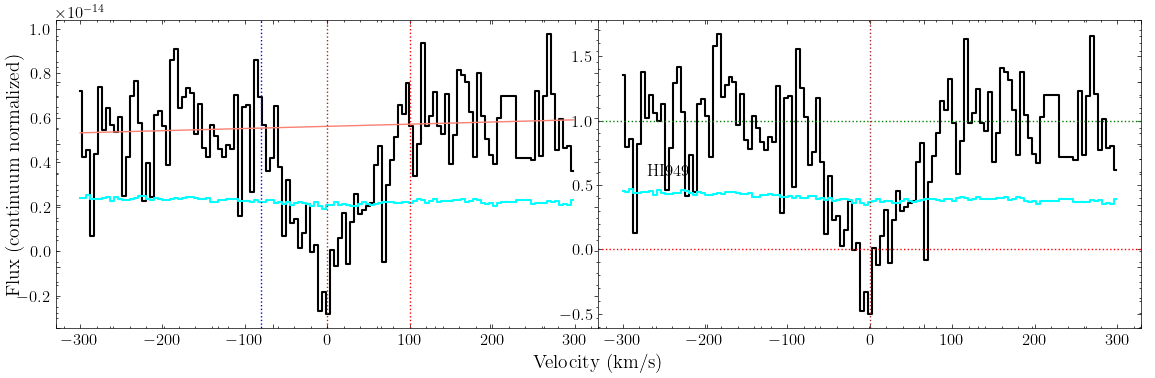

In [90]:
fig, axes = hi_949_stis.plot_ion_transition_spec_cont()

In [91]:
hi_949_stis.grab_ion_transition_lsf(lsf_fits_list)

In [92]:
hi_949_stis.init_ion_transition(init_values = np.array([[16.52,21, 5],[14.69,29,-27]]), 
                             lsf_convolve = True)

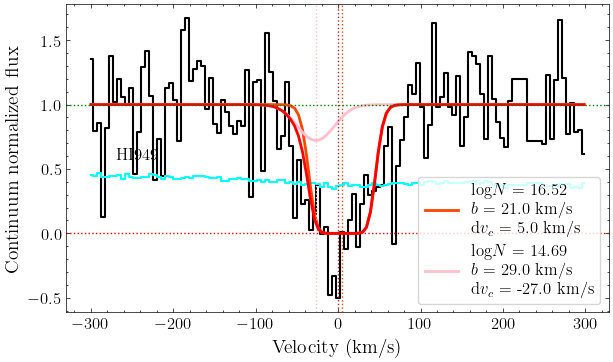

In [93]:
fig, ax = hi_949_stis.plot_ion_transition_init_fit()

In [94]:
hi_949_stis.fit_ion_transition()

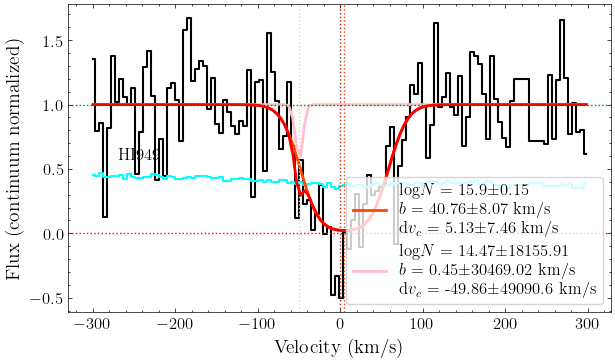

In [95]:
fig, ax = hi_949_stis.plot_ion_transition_best_fit()

## HI 937 (STIS)

In [96]:
hi_937_stis = ion_transition('HI', 937, 'H', z_sys, 'STIS')

In [97]:
hi_937_stis.grab_ion_transition_info()

In [98]:
hi_937_stis.grab_ion_transition_spec(spec_fits_list)

In [99]:
hi_937_stis.cont_norm_flux(renorm=True, v_abs_range=[-100,105], degree=1)

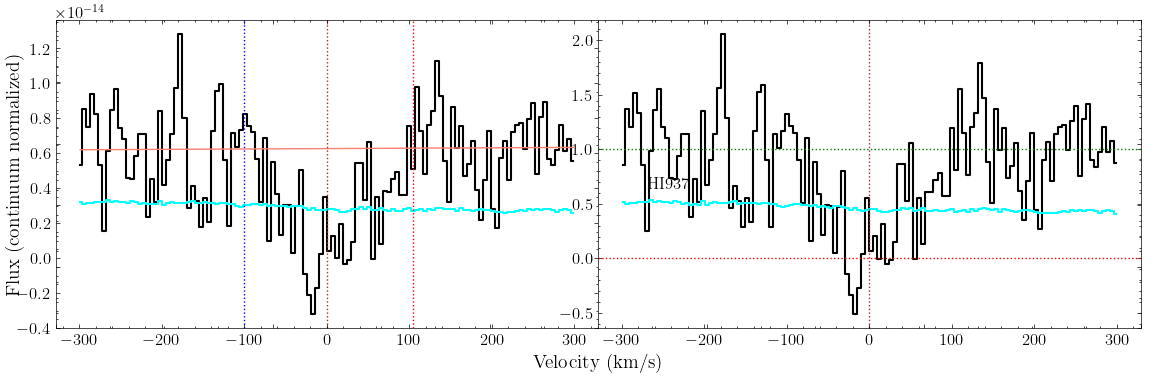

In [100]:
fig, axes = hi_937_stis.plot_ion_transition_spec_cont()

In [101]:
hi_937_stis.grab_ion_transition_lsf(lsf_fits_list)

In [102]:
hi_937_stis.init_ion_transition(init_values = np.array([[16.52,21, 5],[14.69,29,-27]]), 
                             lsf_convolve = True)

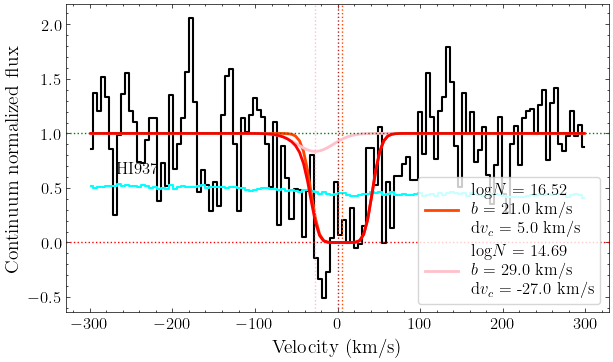

In [103]:
fig, ax = hi_937_stis.plot_ion_transition_init_fit()

In [104]:
hi_937_stis.fit_ion_transition()

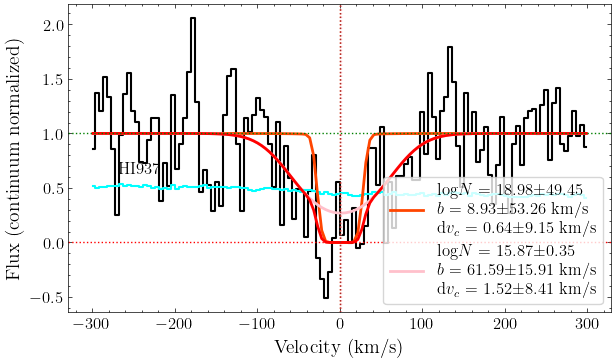

In [105]:
fig, ax = hi_937_stis.plot_ion_transition_best_fit()

## HI 930 (STIS)

In [106]:
hi_930_stis = ion_transition('HI', 930, 'H', z_sys, 'STIS')

In [107]:
hi_930_stis.grab_ion_transition_info()

In [108]:
hi_930_stis.grab_ion_transition_spec(spec_fits_list)

In [109]:
hi_930_stis.cont_norm_flux(renorm=True, v_abs_range=[-100,90], degree=1)

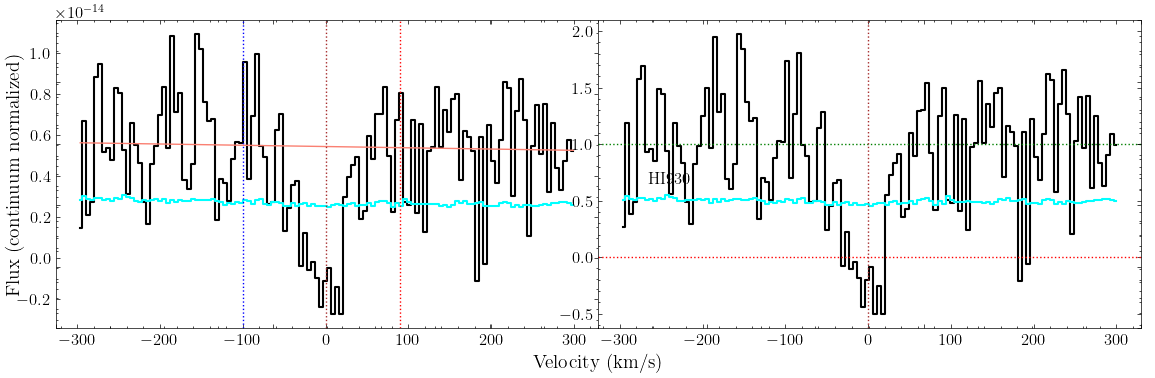

In [110]:
fig, axes = hi_930_stis.plot_ion_transition_spec_cont()

In [111]:
hi_930_stis.grab_ion_transition_lsf(lsf_fits_list)

In [112]:
hi_930_stis.init_ion_transition(init_values = np.array([[16.52,21, 5],[14.69,29,-27]]), 
                             lsf_convolve = True)

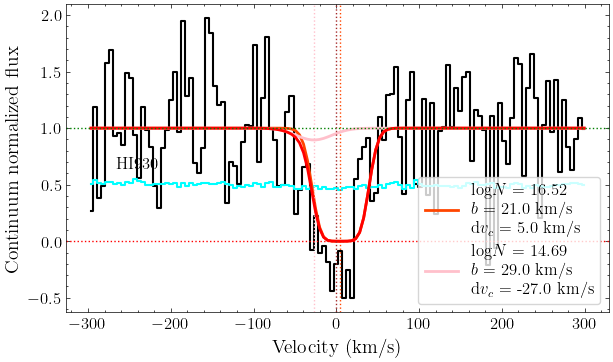

In [113]:
fig, ax = hi_930_stis.plot_ion_transition_init_fit()

In [114]:
hi_930_stis.fit_ion_transition()

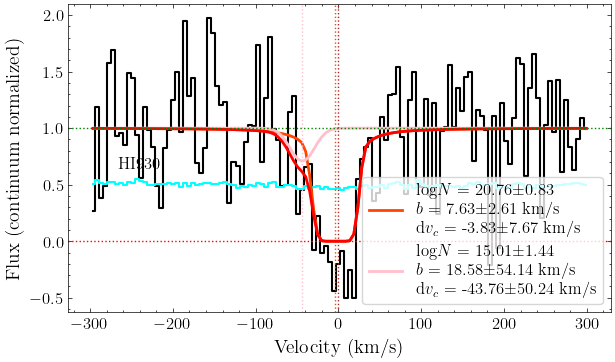

In [115]:
fig, ax = hi_930_stis.plot_ion_transition_best_fit()

## HI 918 (NUV)

In [116]:
hi_918_nuv = ion_transition('HI', 918, 'H', z_sys, 'NUV')

In [117]:
hi_918_nuv.grab_ion_transition_info(delta_v=3)

In [118]:
hi_918_nuv.grab_ion_transition_spec(spec_fits_list, delta_wav=0)

In [119]:
hi_918_nuv.cont_norm_flux(renorm=True, v_abs_range=[-100,90], degree=1)

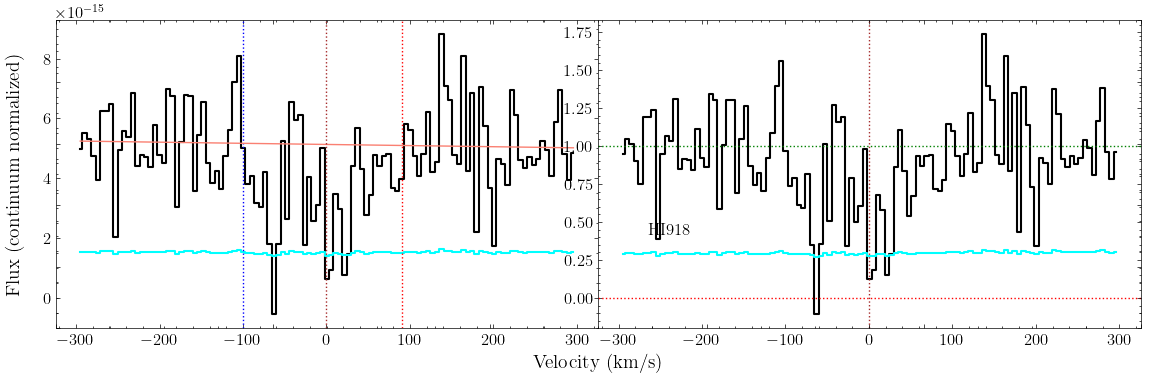

In [120]:
fig, axes = hi_918_nuv.plot_ion_transition_spec_cont()

In [121]:
hi_918_nuv.grab_ion_transition_lsf(lsf_fits_list)

In [122]:
hi_918_nuv.init_ion_transition(init_values = np.array([[16.52,21, 5],[14.69,29,-27]]), 
                             lsf_convolve = True)

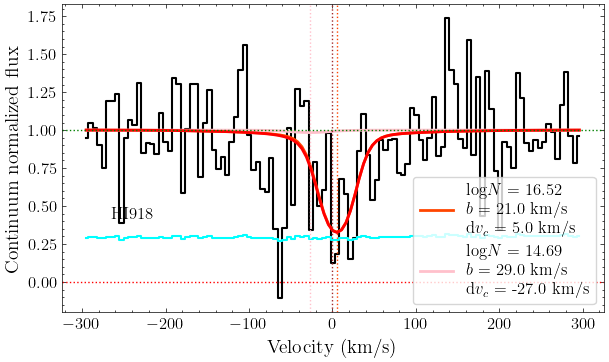

In [123]:
fig, ax = hi_918_nuv.plot_ion_transition_init_fit()

In [124]:
hi_918_nuv.fit_ion_transition()

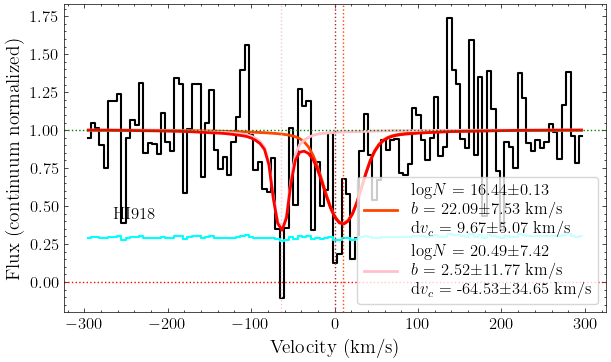

In [125]:
fig, ax = hi_918_nuv.plot_ion_transition_best_fit()

In [126]:
delta_wav_nuv_1 = hi_918_nuv.wav0_obs*hi_918_nuv.delta_v/3e+5

In [127]:
delta_wav_nuv_1

0.019885847306246002

## HI ion

In [128]:
hi = ion(1.1659, 'HI', [hi_1215_stis, hi_1025_stis, hi_972_stis, hi_949_stis, hi_937_stis, hi_930_stis, hi_918_nuv])

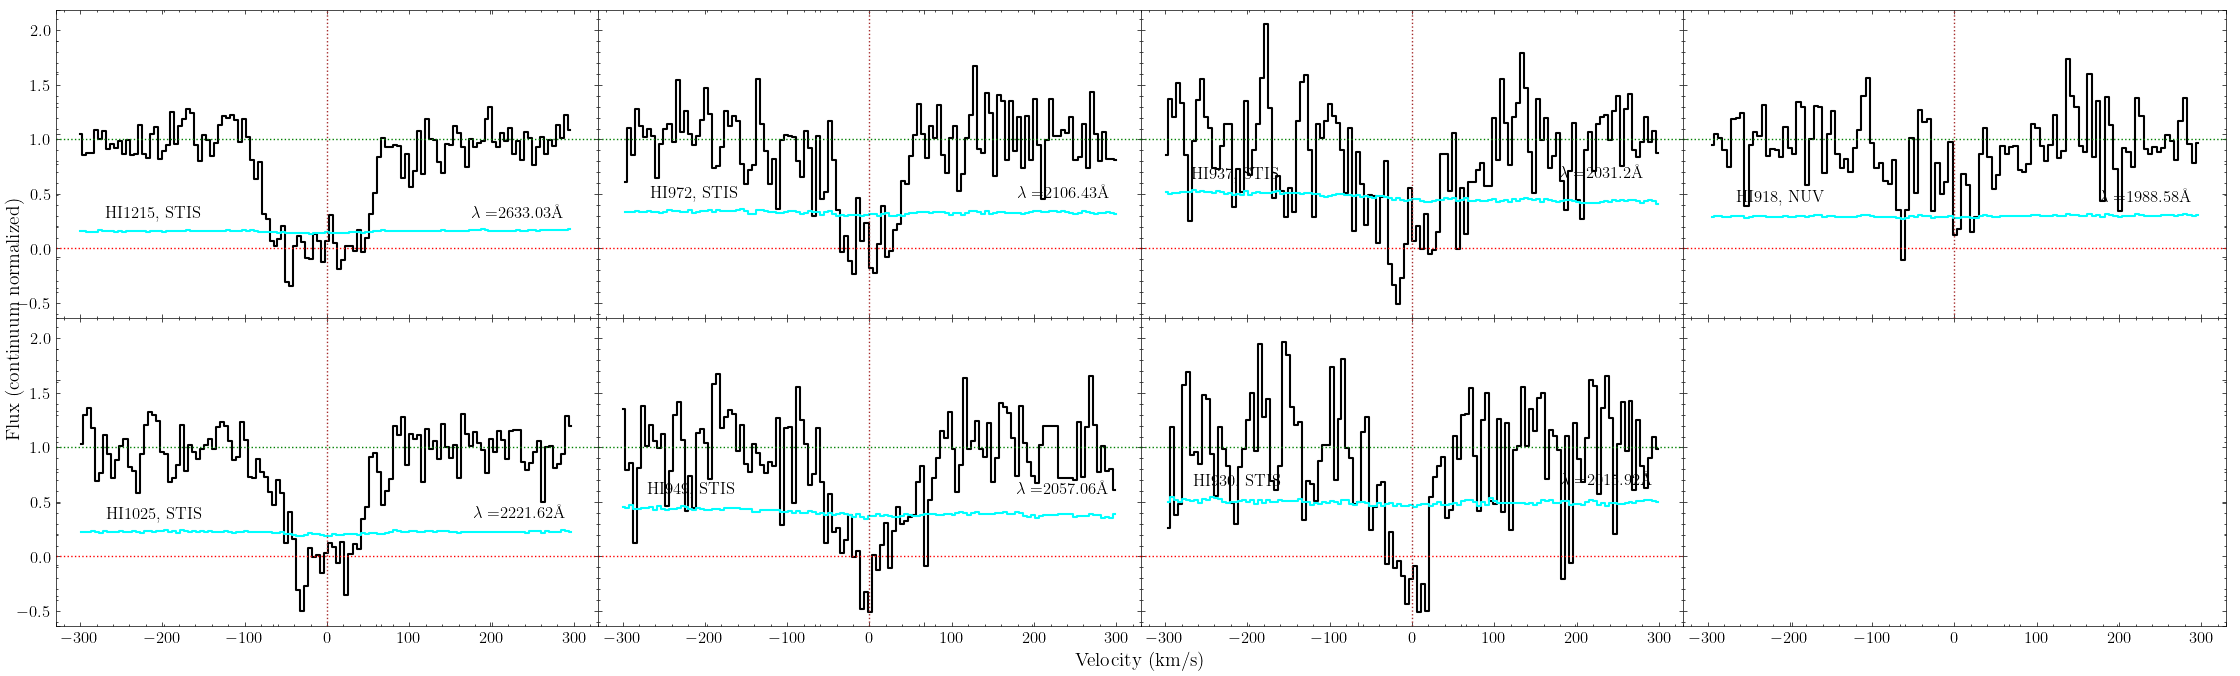

In [129]:
fig, axes = hi.plot_ion(n_cols=4)

In [130]:
hi.init_ion([[[16.52,21, 5],[14.69,29,-27]],
            [[16.52,21, 5],[14.69,29,-27]],
            [[16.52,21, 5],[14.69,29,-27]],
            [[16.52,21, 5],[14.69,29,-27]],
            [[16.52,21, 5],[14.69,29,-27]],
            [[16.52,21, 5],[14.69,29,-27]],
            [[16.52,21, 5],[14.69,29,-27]],
            [[16.52,21, 5],[14.69,29,-27]]])

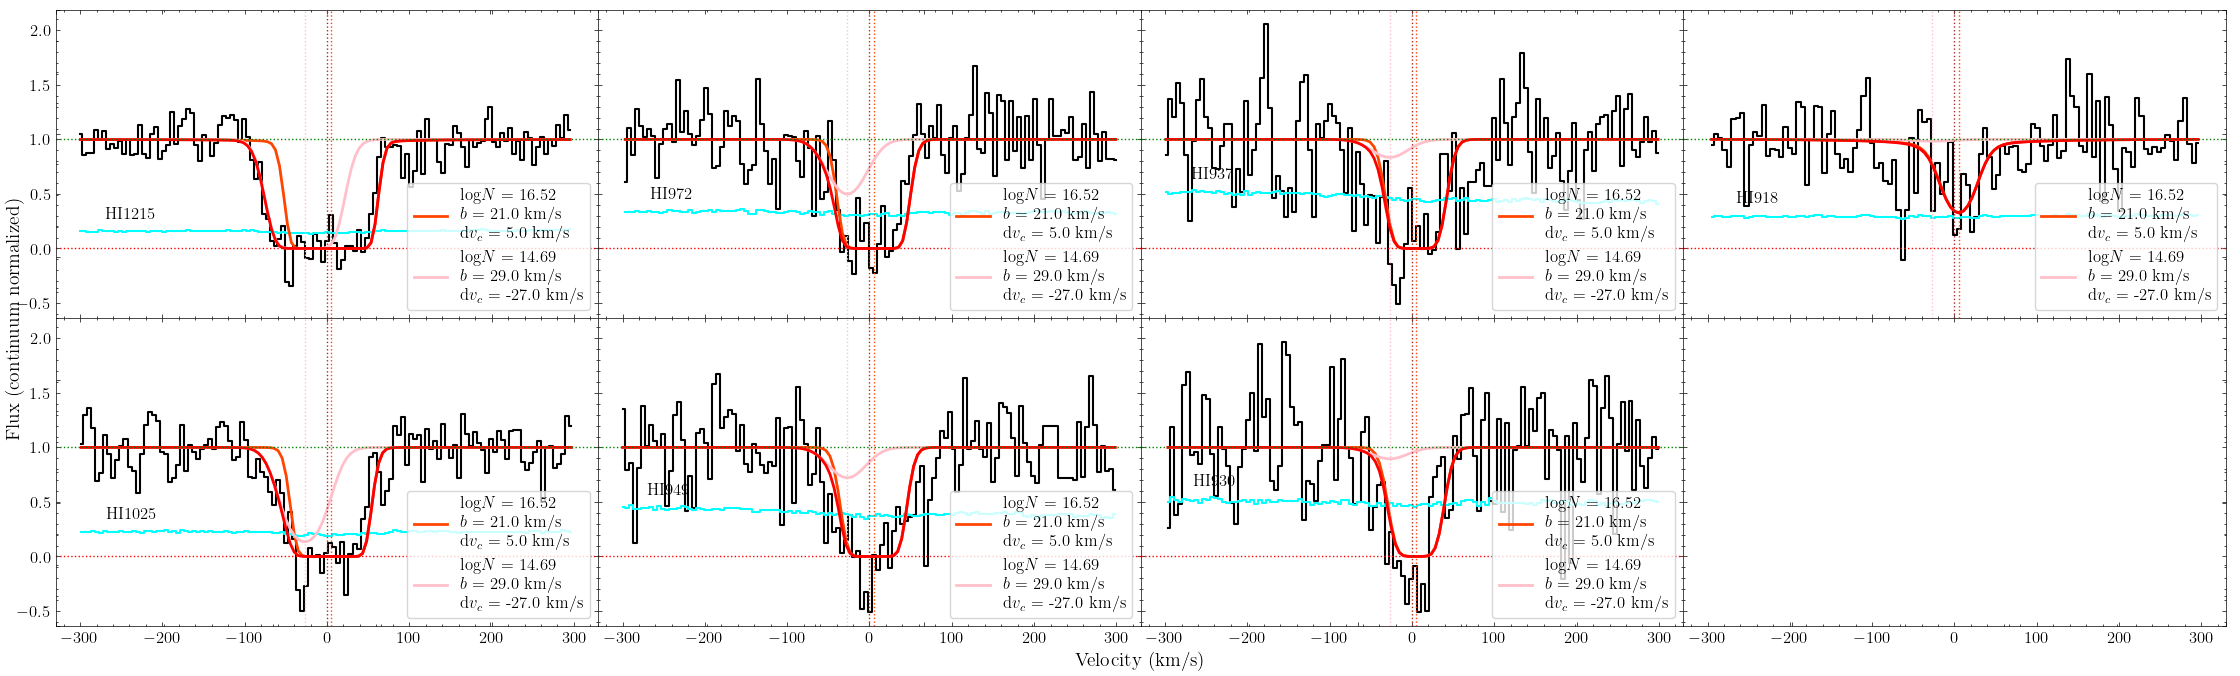

In [131]:
fig, axes = hi.plot_ion_init_fit(n_cols=4)

In [132]:
hi.fit_ion(tie_params_list=[['it1c1_logN', 'it2c1_logN'], # Tie logN for c1
                            ['it1c1_logN', 'it3c1_logN'],
                            ['it1c1_logN', 'it4c1_logN'],
                            ['it1c1_logN', 'it5c1_logN'],
                            ['it1c1_logN', 'it6c1_logN'],
                            ['it1c1_logN', 'it7c1_logN'],
                            ['it1c1_b', 'it2c1_b'], # Tie b for c1
                            ['it1c1_b', 'it3c1_b'],
                            ['it1c1_b', 'it4c1_b'],
                            ['it1c1_b', 'it5c1_b'],
                            ['it1c1_b', 'it6c1_b'],
                            ['it1c1_b', 'it7c1_b'],
                            ['it1c1_dv_c', 'it2c1_dv_c'], # Tie dv_c for c1
                            ['it1c1_dv_c', 'it3c1_dv_c'], 
                            ['it1c1_dv_c', 'it4c1_dv_c'],
                            ['it1c1_dv_c', 'it5c1_dv_c'],
                            ['it1c1_dv_c', 'it6c1_dv_c'],
                            ['it1c1_dv_c', 'it7c1_dv_c'],
                            ['it1c2_logN', 'it2c2_logN'], # Tie logN for c2
                            ['it1c2_logN', 'it3c2_logN'],
                            ['it1c2_logN', 'it4c2_logN'],
                            ['it1c2_logN', 'it5c2_logN'],
                            ['it1c2_logN', 'it6c2_logN'],
                            ['it1c2_logN', 'it7c2_logN'],
                            ['it1c2_b', 'it2c2_b'], # Tie b for c2
                            ['it1c2_b', 'it3c2_b'],
                            ['it1c2_b', 'it4c2_b'],
                            ['it1c2_b', 'it5c2_b'],
                            ['it1c2_b', 'it6c2_b'],
                            ['it1c2_b', 'it7c2_b'],
                            ['it1c2_dv_c', 'it2c2_dv_c'], # Tie dv_c for c2
                            ['it1c2_dv_c', 'it3c2_dv_c'],
                            ['it1c2_dv_c', 'it4c2_dv_c'],
                            ['it1c2_dv_c', 'it5c2_dv_c'],
                            ['it1c2_dv_c', 'it6c2_dv_c'],
                            ['it1c2_dv_c', 'it7c2_dv_c']])
            #fix_params_list = ['it1c2_dv_c'])

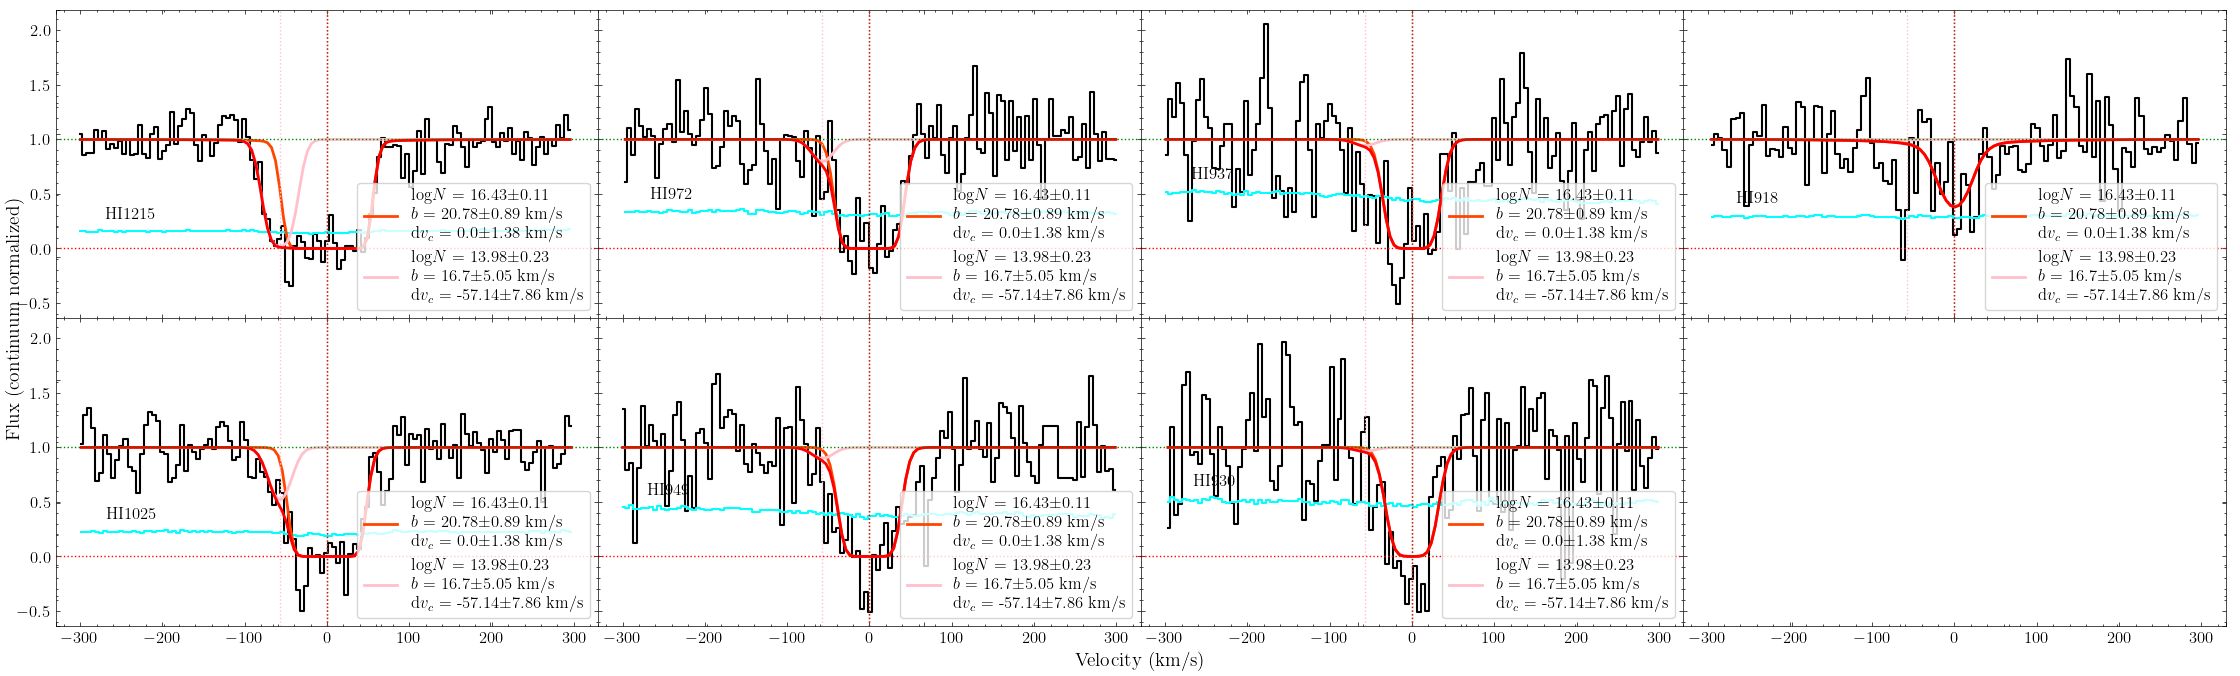

In [133]:
fig, axes = hi.plot_ion_best_fit(n_cols=4)

# STIS: z=1.09454 CIII 977

In [134]:
ciii_977_stis = ion_transition('CIII', 977, 'C', 1.09458, 'STIS')

In [135]:
ciii_977_stis.grab_ion_transition_info()

In [136]:
ciii_977_stis.grab_ion_transition_spec(spec_fits_list)

In [137]:
ciii_977_stis.cont_norm_flux(renorm=True, v_abs_range=[-90,90], degree=1)

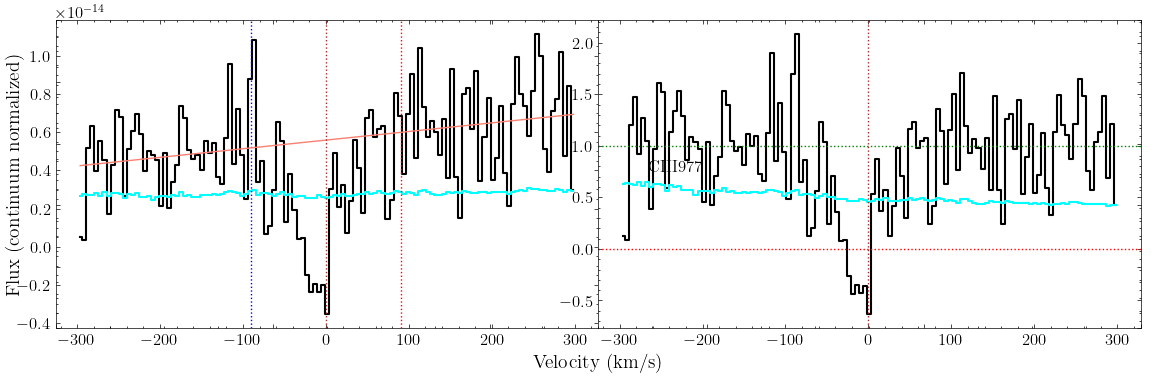

In [138]:
fig, axes = ciii_977_stis.plot_ion_transition_spec_cont()

# NUV: z=1.09454 CIII 977

In [139]:
ciii_977_nuv = ion_transition('CIII', 977, 'C', 1.09458, 'NUV')

In [140]:
ciii_977_nuv.grab_ion_transition_info(delta_v=3)

In [141]:
ciii_977_nuv.grab_ion_transition_spec(spec_fits_list, delta_wav=0)

In [142]:
ciii_977_nuv.cont_norm_flux(renorm=True, v_abs_range=[-150,90], degree=1)

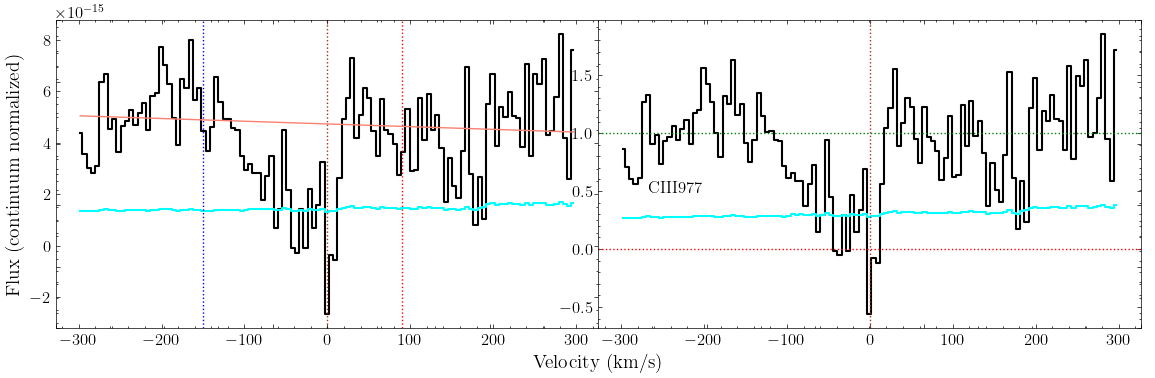

In [143]:
fig, axes = ciii_977_nuv.plot_ion_transition_spec_cont()

In [144]:
delta_wav_nuv_2 = ciii_977_nuv.wav0_obs*ciii_977_nuv.delta_v/3e+5

In [145]:
delta_wav_nuv_2

0.02046446761058

# NUV wavelength offset

In [146]:
delta_wav_nuv = .5*(delta_wav_nuv_1 + delta_wav_nuv_2)

In [147]:
delta_wav_nuv_1, delta_wav_nuv_2, delta_wav_nuv

(0.019885847306246002, 0.02046446761058, 0.020175157458413)

# Final calibration results: HIRES + FUV + STIS

## HIRES MW CaII 3969

In [148]:
caii_3969_hires = ion_transition('CaII', 3969, 'Ca', -1.3e-4, 'HIRES')

In [149]:
caii_3969_hires.grab_ion_transition_info()

In [150]:
caii_3969_hires.grab_ion_transition_spec(spec_fits_list)

In [151]:
caii_3969_hires.cont_norm_flux(renorm=False, v_abs_range=[-80,110], degree=1)

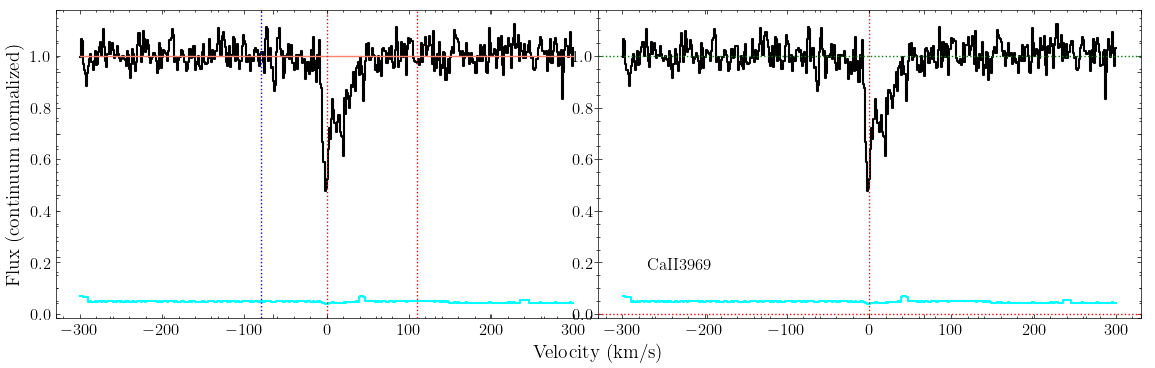

In [152]:
fig, axes = caii_3969_hires.plot_ion_transition_spec_cont()

## HIRES CaII 3934

In [153]:
caii_3934_hires = ion_transition('CaII', 3934, 'Ca', -1.3e-4, 'HIRES')

In [154]:
caii_3934_hires.grab_ion_transition_info()

In [155]:
caii_3934_hires.grab_ion_transition_spec(spec_fits_list)

In [156]:
caii_3934_hires.cont_norm_flux(renorm=False, v_abs_range=[-80,110], degree=1)

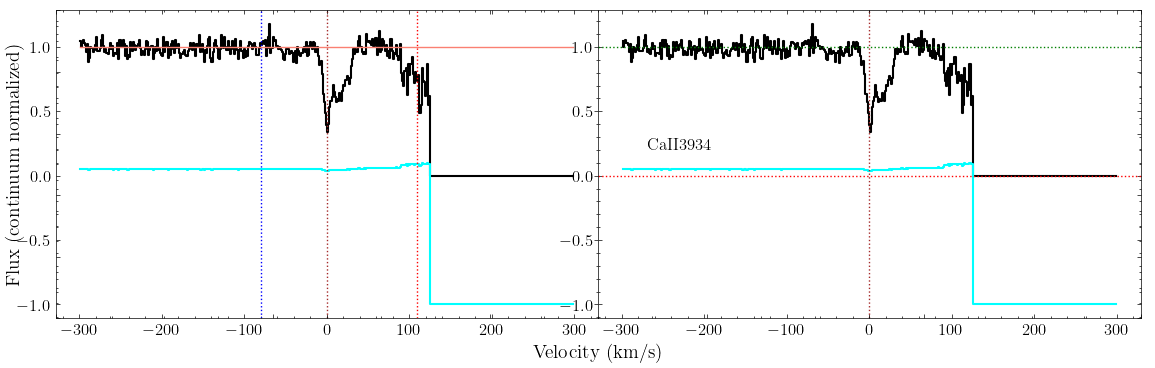

In [157]:
fig, axes = caii_3934_hires.plot_ion_transition_spec_cont()

## FUV: MW CII* 1335

In [158]:
cii_1335_fuv = ion_transition('CII*', 1335, 'C', -1.3e-4, 'FUV')

In [159]:
cii_1335_fuv.grab_ion_transition_info()

In [160]:
cii_1335_fuv.grab_ion_transition_spec(spec_fits_list, masks=[[-300,-180]])

In [161]:
cii_1335_fuv.cont_norm_flux(renorm=True, v_abs_range=[-50,70], degree=1)

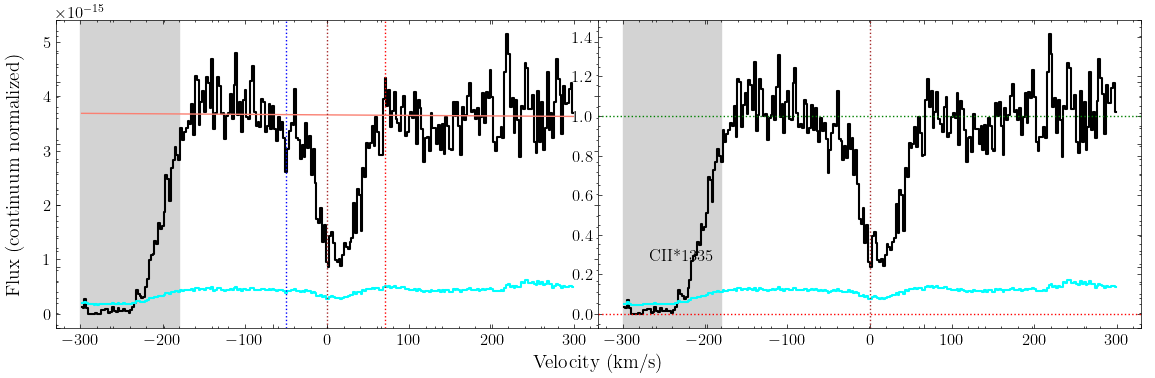

In [162]:
fig, axes = cii_1335_fuv.plot_ion_transition_spec_cont()

## FUV: MW NI 1200

In [163]:
ni_1200_fuv = ion_transition('NI', 1200.71, 'N', -1.3e-4, 'FUV')

In [164]:
ni_1200_fuv.grab_ion_transition_info()

In [165]:
ni_1200_fuv.grab_ion_transition_spec(spec_fits_list, masks=[[-300,-240],[-180,-70]])

In [166]:
ni_1200_fuv.cont_norm_flux(renorm=True, v_abs_range=[-40,70], degree=1)

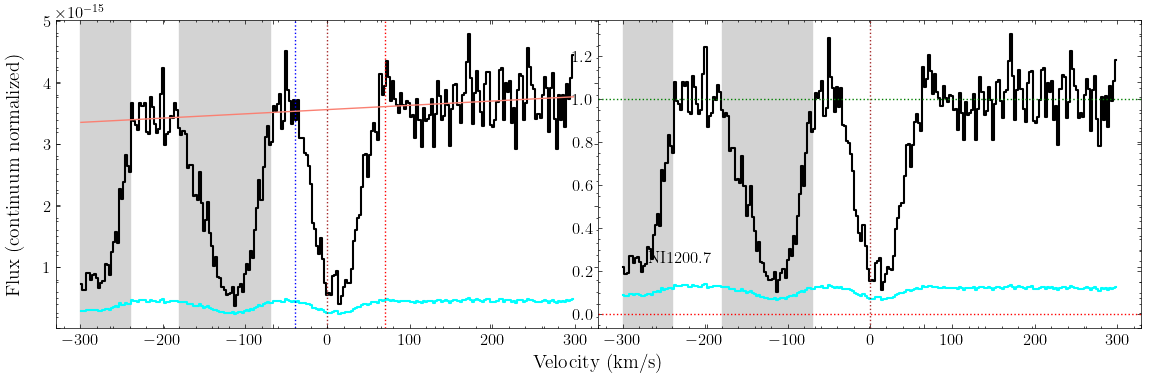

In [167]:
fig, axes = ni_1200_fuv.plot_ion_transition_spec_cont()

## STIS: MW FeII 2344

In [168]:
feii_2344_stis = ion_transition('FeII', 2344, 'Fe', -1.3e-4, 'STIS')

In [169]:
feii_2344_stis.grab_ion_transition_info()

In [170]:
feii_2344_stis.grab_ion_transition_spec(spec_fits_list)

In [171]:
feii_2344_stis.cont_norm_flux(renorm=True, v_abs_range=[-90,90], degree=1)

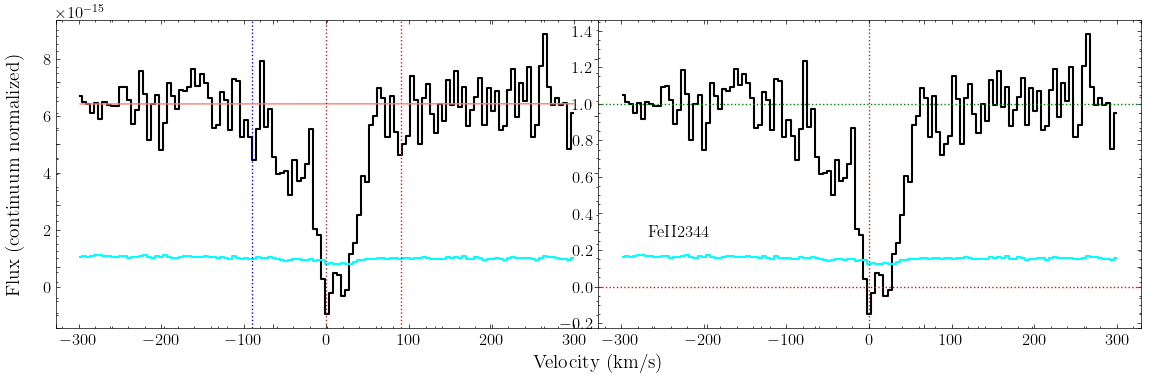

In [172]:
fig, axes = feii_2344_stis.plot_ion_transition_spec_cont()

## FeII 2586

In [173]:
feii_2586_stis = ion_transition('FeII', 2586, 'Fe', -1.3e-4, 'STIS')

In [174]:
feii_2586_stis.grab_ion_transition_info()

In [175]:
feii_2586_stis.grab_ion_transition_spec(spec_fits_list)

In [176]:
feii_2586_stis.cont_norm_flux(renorm=True, v_abs_range=[-90,90], degree=1)

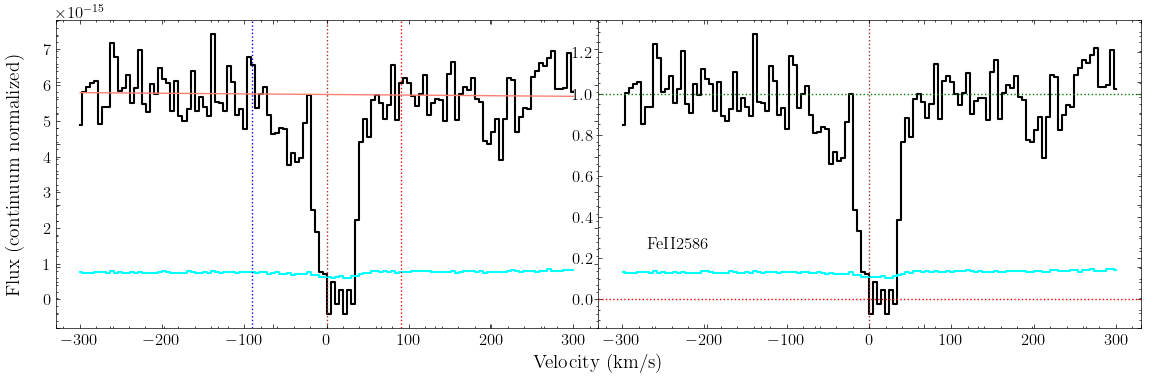

In [177]:
fig, axes = feii_2586_stis.plot_ion_transition_spec_cont()

## (Calibrated) MW summary

In [178]:
summary_mw = ion(-1.3e-4, 'MW Summary', [caii_3969_hires, caii_3934_hires, 
                                   cii_1335_fuv, ni_1200_fuv, feii_2344_stis, feii_2586_stis])

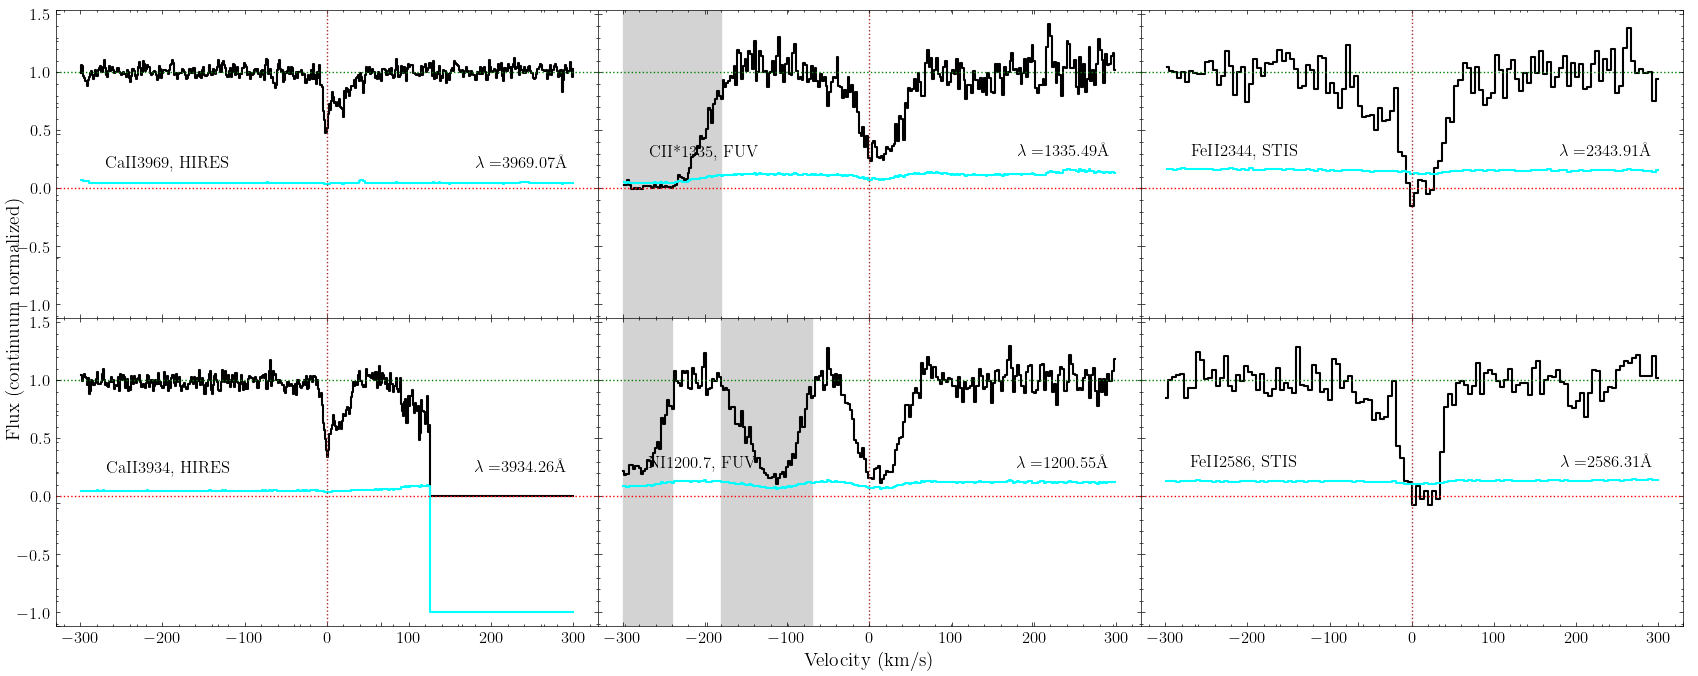

In [179]:
fig, axes = summary_mw.plot_ion(n_cols=3)

# Final calibration results: STIS + NUV

## z=1.1659 HI

In [180]:
z_sys = 1.165909

### HI 1215 (STIS)

In [181]:
hi_1215_stis = ion_transition('HI', 1215, 'H', z_sys, 'STIS')

In [182]:
hi_1215_stis.grab_ion_transition_info()

In [183]:
hi_1215_stis.grab_ion_transition_spec(spec_fits_list)

In [184]:
hi_1215_stis.cont_norm_flux(renorm=True, v_abs_range=[-100,120], degree=1)

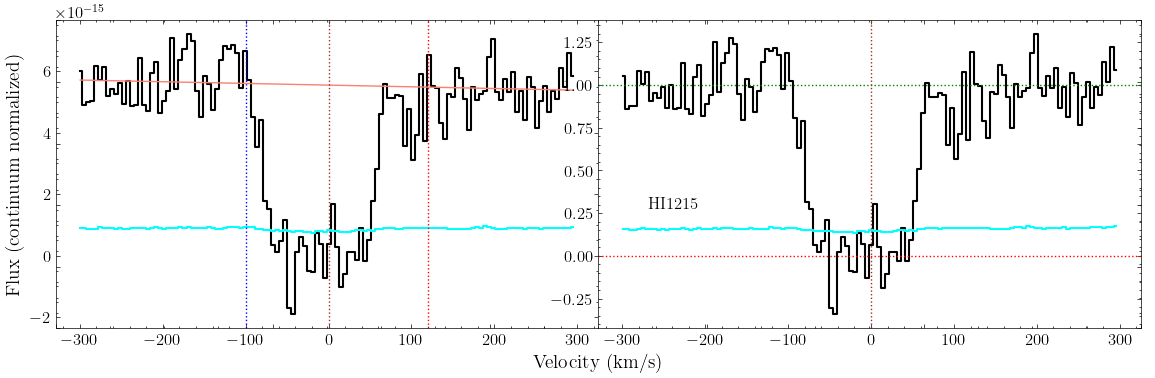

In [185]:
fig, axes = hi_1215_stis.plot_ion_transition_spec_cont()

In [186]:
hi_1215_stis.grab_ion_transition_lsf(lsf_fits_list)

In [187]:
hi_1215_stis.init_ion_transition(init_values = np.array([[16.52,21, 5],[14.69,29,-27]]), 
                             lsf_convolve = True)

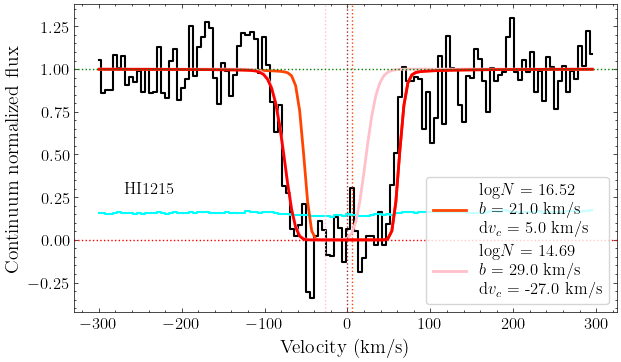

In [188]:
fig, ax = hi_1215_stis.plot_ion_transition_init_fit()

In [189]:
hi_1215_stis.fit_ion_transition()

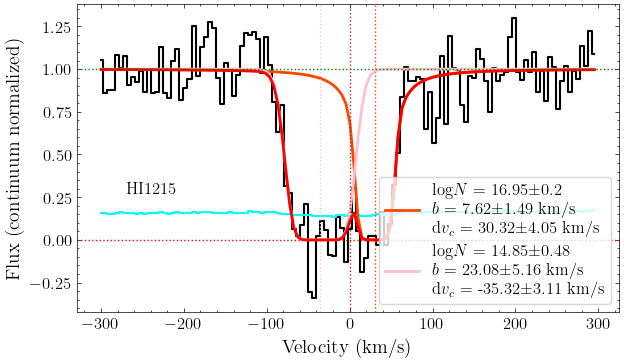

In [190]:
fig, ax = hi_1215_stis.plot_ion_transition_best_fit()

### HI 1025 (STIS)

In [191]:
hi_1025_stis = ion_transition('HI', 1025, 'H', z_sys, 'STIS')

In [192]:
hi_1025_stis.grab_ion_transition_info()

In [193]:
hi_1025_stis.grab_ion_transition_spec(spec_fits_list)

In [194]:
hi_1025_stis.cont_norm_flux(renorm=True, v_abs_range=[-100,90], degree=1)

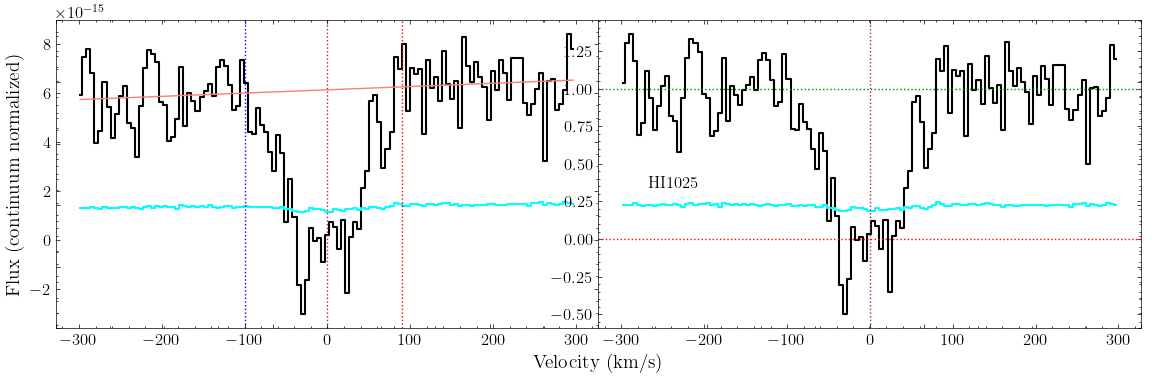

In [195]:
fig, axes = hi_1025_stis.plot_ion_transition_spec_cont()

In [196]:
hi_1025_stis.grab_ion_transition_lsf(lsf_fits_list)

In [197]:
hi_1025_stis.init_ion_transition(init_values = np.array([[16.52,21, 5],[14.69,29,-27]]), 
                             lsf_convolve = True)

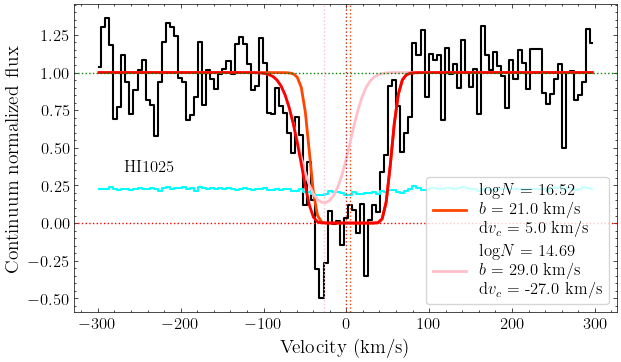

In [198]:
fig, ax = hi_1025_stis.plot_ion_transition_init_fit()

In [199]:
hi_1025_stis.fit_ion_transition()

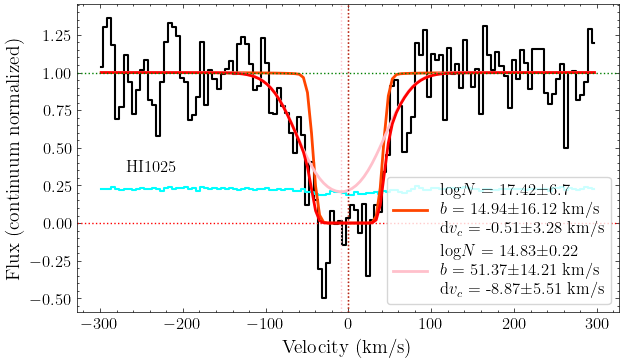

In [200]:
fig, ax = hi_1025_stis.plot_ion_transition_best_fit()

### HI 972 (STIS)

In [201]:
hi_972_stis = ion_transition('HI', 972, 'H', z_sys, 'STIS')

In [202]:
hi_972_stis.grab_ion_transition_info()

In [203]:
hi_972_stis.grab_ion_transition_spec(spec_fits_list)

In [204]:
hi_972_stis.cont_norm_flux(renorm=True, v_abs_range=[-80,80], degree=1)

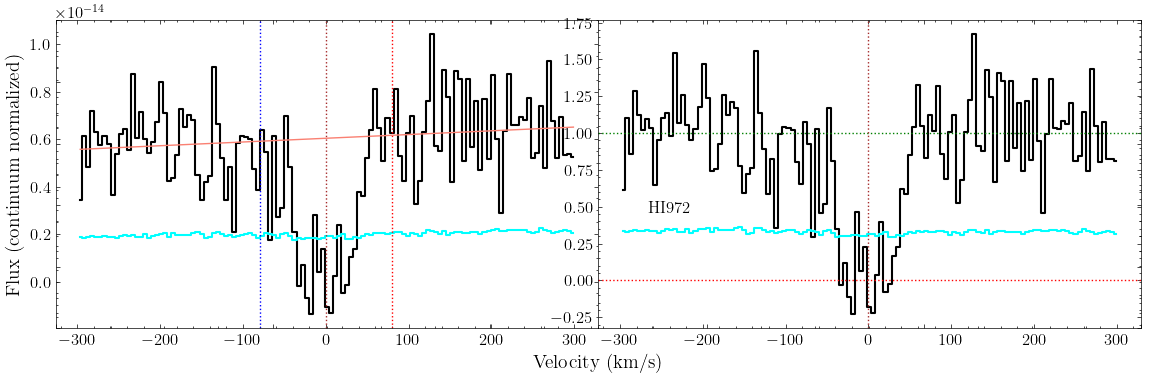

In [205]:
fig, axes = hi_972_stis.plot_ion_transition_spec_cont()

In [206]:
hi_972_stis.grab_ion_transition_lsf(lsf_fits_list)

In [207]:
hi_972_stis.init_ion_transition(init_values = np.array([[16.52,21, 5],[14.69,29,-27]]), 
                             lsf_convolve = True)

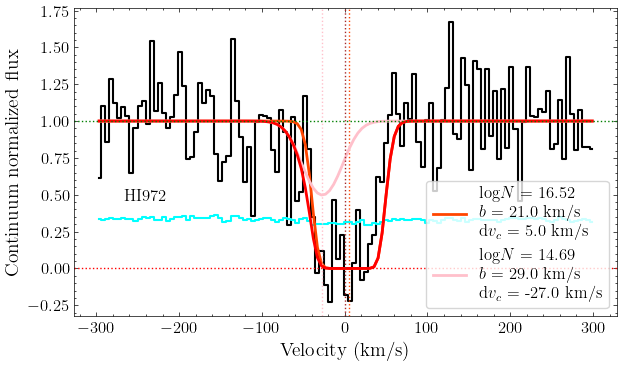

In [208]:
fig, ax = hi_972_stis.plot_ion_transition_init_fit()

In [209]:
hi_972_stis.fit_ion_transition()

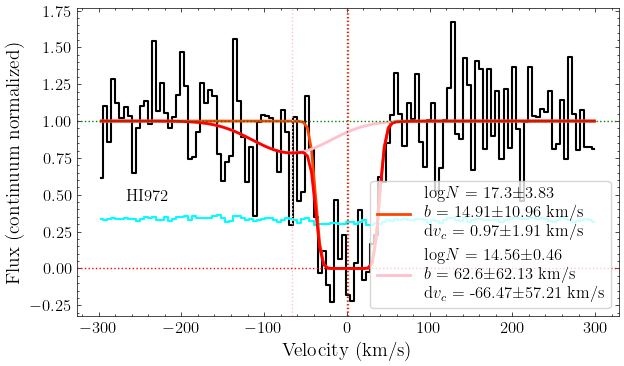

In [210]:
fig, ax = hi_972_stis.plot_ion_transition_best_fit()

### HI 949 (STIS)

In [211]:
hi_949_stis = ion_transition('HI', 949, 'H', z_sys, 'STIS')

In [212]:
hi_949_stis.grab_ion_transition_info()

In [213]:
hi_949_stis.grab_ion_transition_spec(spec_fits_list)

In [214]:
hi_949_stis.cont_norm_flux(renorm=True, v_abs_range=[-80,100], degree=1)

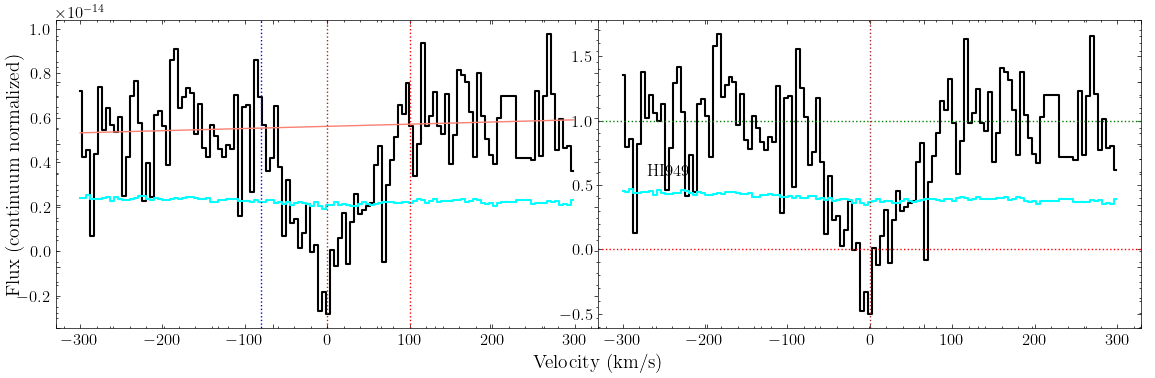

In [215]:
fig, axes = hi_949_stis.plot_ion_transition_spec_cont()

In [216]:
hi_949_stis.grab_ion_transition_lsf(lsf_fits_list)

In [217]:
hi_949_stis.init_ion_transition(init_values = np.array([[16.52,21, 5],[14.69,29,-27]]), 
                             lsf_convolve = True)

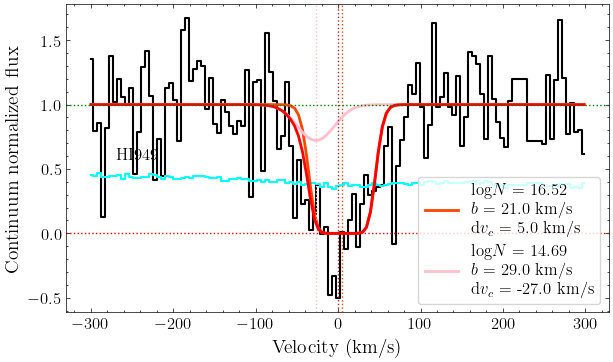

In [218]:
fig, ax = hi_949_stis.plot_ion_transition_init_fit()

In [219]:
hi_949_stis.fit_ion_transition()

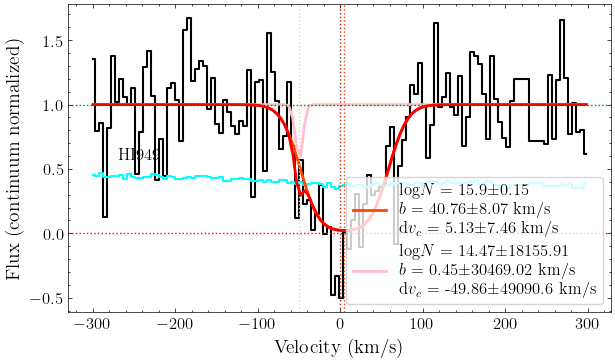

In [220]:
fig, ax = hi_949_stis.plot_ion_transition_best_fit()

### HI 937 (STIS)

In [221]:
hi_937_stis = ion_transition('HI', 937, 'H', z_sys, 'STIS')

In [222]:
hi_937_stis.grab_ion_transition_info()

In [223]:
hi_937_stis.grab_ion_transition_spec(spec_fits_list)

In [224]:
hi_937_stis.cont_norm_flux(renorm=True, v_abs_range=[-100,105], degree=1)

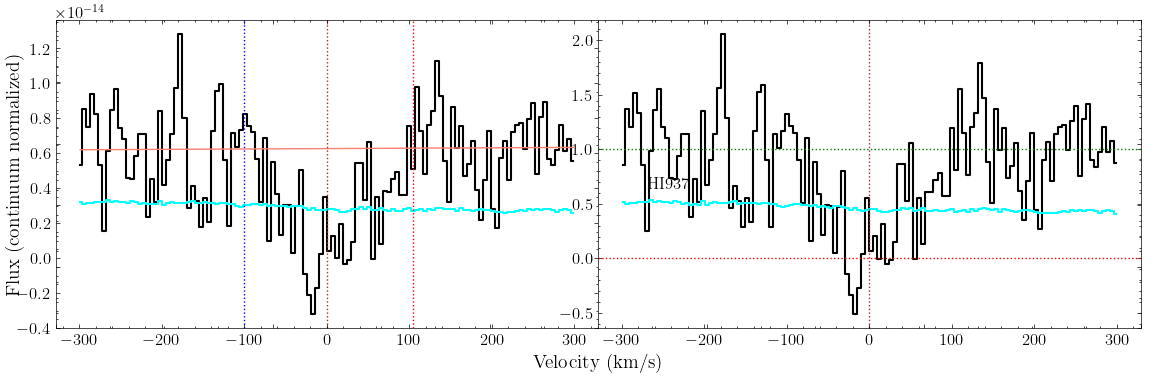

In [225]:
fig, axes = hi_937_stis.plot_ion_transition_spec_cont()

In [226]:
hi_937_stis.grab_ion_transition_lsf(lsf_fits_list)

In [227]:
hi_937_stis.init_ion_transition(init_values = np.array([[16.52,21, 5],[14.69,29,-27]]), 
                             lsf_convolve = True)

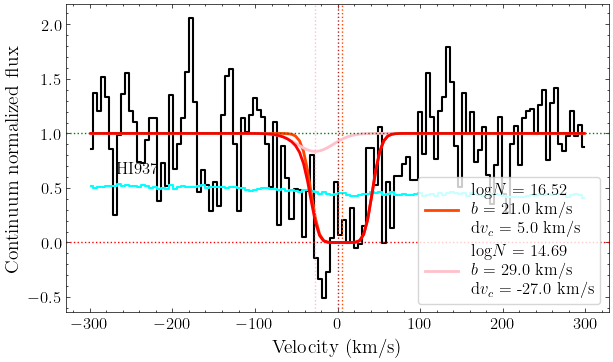

In [228]:
fig, ax = hi_937_stis.plot_ion_transition_init_fit()

In [229]:
hi_937_stis.fit_ion_transition()

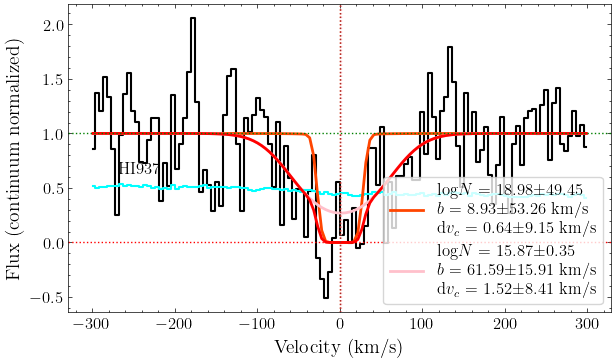

In [230]:
fig, ax = hi_937_stis.plot_ion_transition_best_fit()

### HI 930 (STIS)

In [231]:
hi_930_stis = ion_transition('HI', 930, 'H', z_sys, 'STIS')

In [232]:
hi_930_stis.grab_ion_transition_info()

In [233]:
hi_930_stis.grab_ion_transition_spec(spec_fits_list)

In [234]:
hi_930_stis.cont_norm_flux(renorm=True, v_abs_range=[-100,90], degree=1)

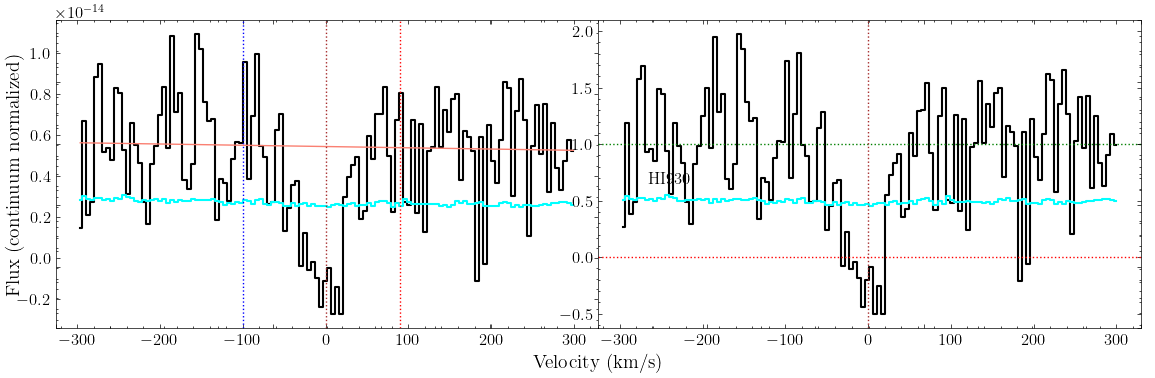

In [235]:
fig, axes = hi_930_stis.plot_ion_transition_spec_cont()

In [236]:
hi_930_stis.grab_ion_transition_lsf(lsf_fits_list)

In [237]:
hi_930_stis.init_ion_transition(init_values = np.array([[16.52,21, 5],[14.69,29,-27]]), 
                             lsf_convolve = True)

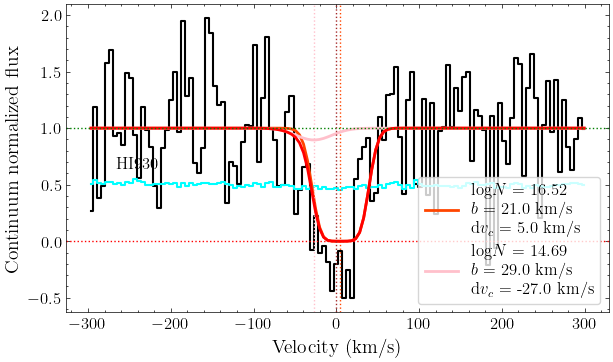

In [238]:
fig, ax = hi_930_stis.plot_ion_transition_init_fit()

In [239]:
hi_930_stis.fit_ion_transition()

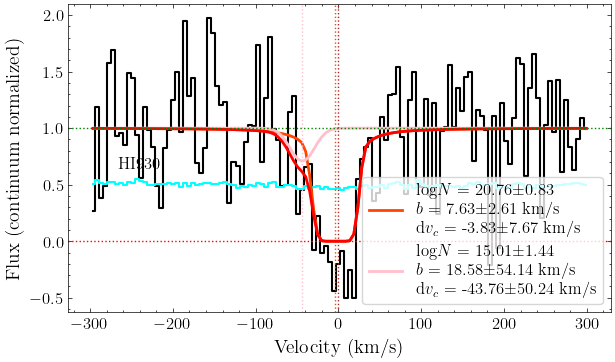

In [240]:
fig, ax = hi_930_stis.plot_ion_transition_best_fit()

### HI 918 (NUV)

In [241]:
hi_918_nuv = ion_transition('HI', 918, 'H', z_sys, 'NUV')

In [242]:
hi_918_nuv.grab_ion_transition_info()

In [243]:
hi_918_nuv.grab_ion_transition_spec(spec_fits_list)

In [244]:
hi_918_nuv.cont_norm_flux(renorm=True, v_abs_range=[-100,90], degree=1)

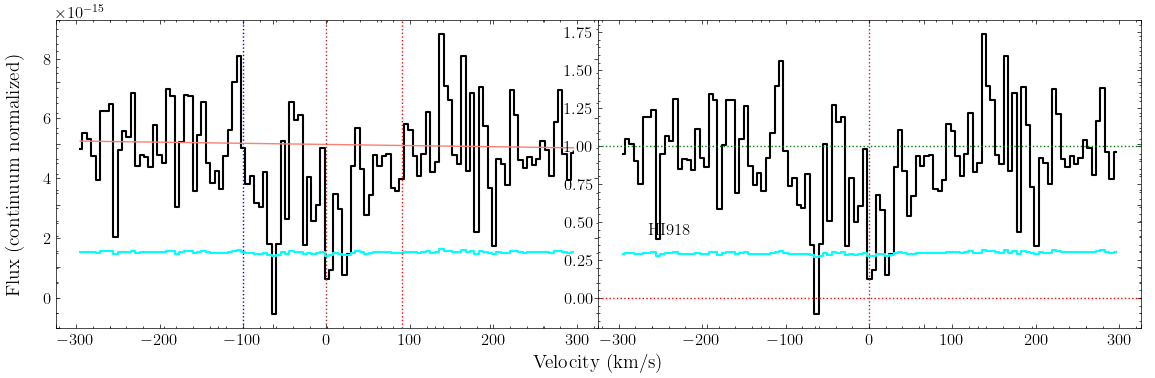

In [245]:
fig, axes = hi_918_nuv.plot_ion_transition_spec_cont()

In [246]:
hi_918_nuv.grab_ion_transition_lsf(lsf_fits_list)

In [247]:
hi_918_nuv.init_ion_transition(init_values = np.array([[16.52,21, 5],[14.69,29,-27]]), 
                             lsf_convolve = True)

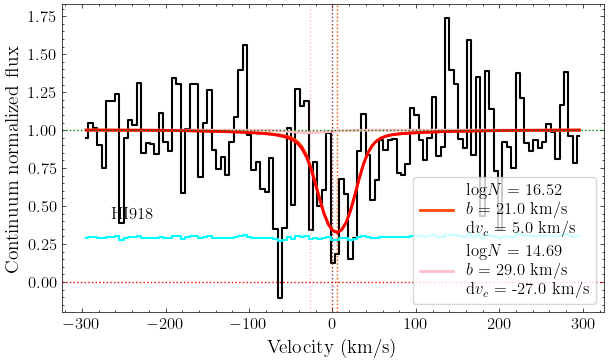

In [248]:
fig, ax = hi_918_nuv.plot_ion_transition_init_fit()

In [249]:
hi_918_nuv.fit_ion_transition()

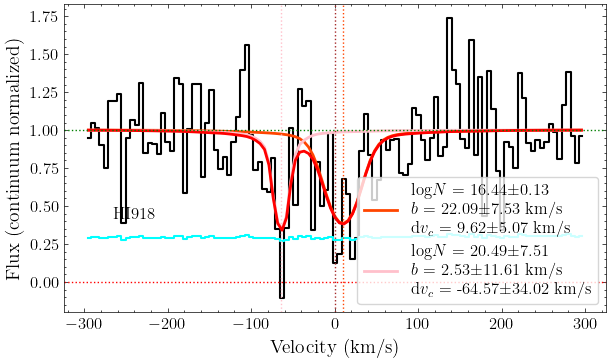

In [250]:
fig, ax = hi_918_nuv.plot_ion_transition_best_fit()

### HI ion

In [251]:
hi = ion(1.1659, 'HI', [hi_1215_stis, hi_1025_stis, hi_972_stis, hi_949_stis, hi_937_stis, hi_930_stis, hi_918_nuv])

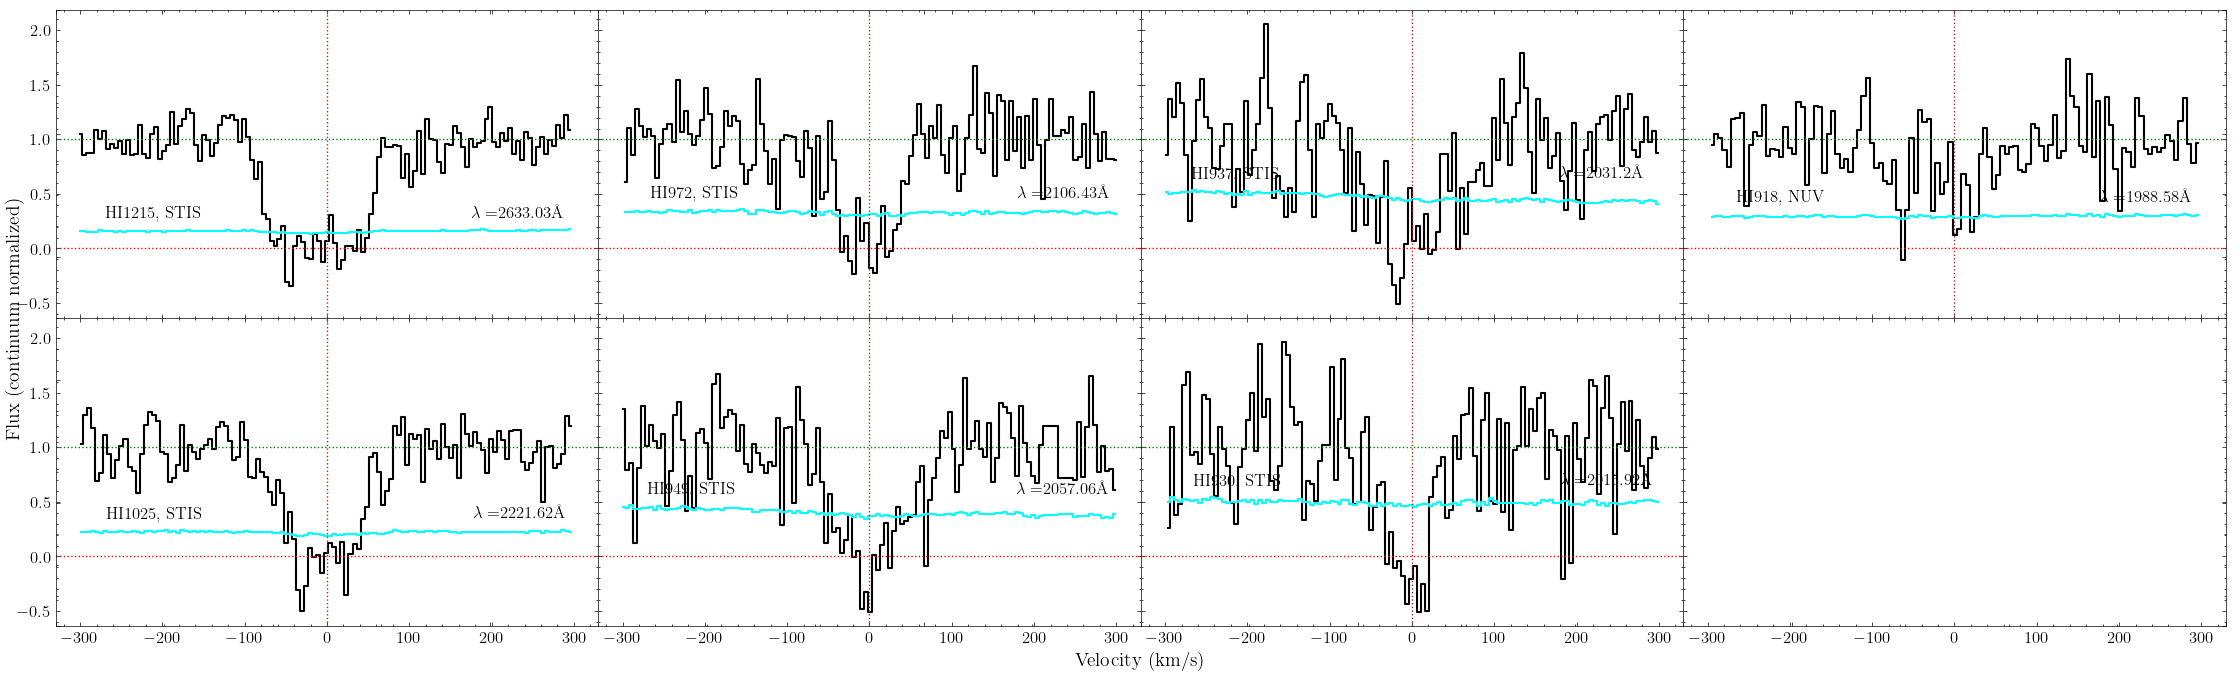

In [252]:
fig, axes = hi.plot_ion(n_cols=4)

In [253]:
hi.init_ion([[[16.52,21, 5],[14.69,29,-27]],
            [[16.52,21, 5],[14.69,29,-27]],
            [[16.52,21, 5],[14.69,29,-27]],
            [[16.52,21, 5],[14.69,29,-27]],
            [[16.52,21, 5],[14.69,29,-27]],
            [[16.52,21, 5],[14.69,29,-27]],
            [[16.52,21, 5],[14.69,29,-27]],
            [[16.52,21, 5],[14.69,29,-27]]])

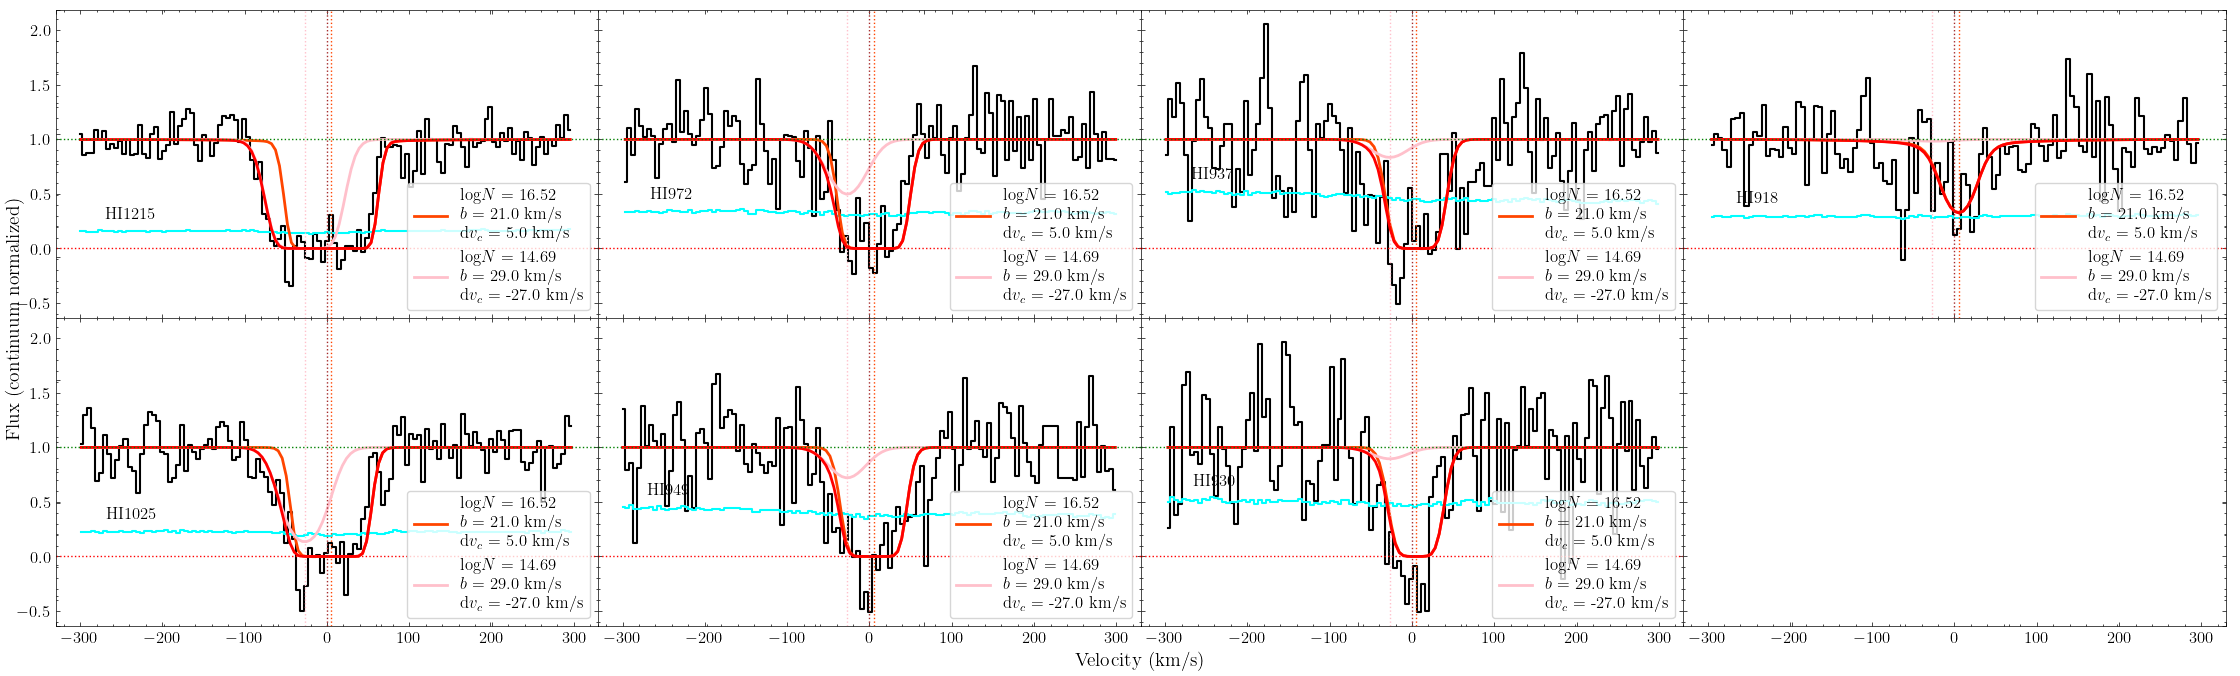

In [254]:
fig, axes = hi.plot_ion_init_fit(n_cols=4)

In [255]:
hi.fit_ion(tie_params_list=[['it1c1_logN', 'it2c1_logN'], # Tie logN for c1
                            ['it1c1_logN', 'it3c1_logN'],
                            ['it1c1_logN', 'it4c1_logN'],
                            ['it1c1_logN', 'it5c1_logN'],
                            ['it1c1_logN', 'it6c1_logN'],
                            ['it1c1_logN', 'it7c1_logN'],
                            ['it1c1_b', 'it2c1_b'], # Tie b for c1
                            ['it1c1_b', 'it3c1_b'],
                            ['it1c1_b', 'it4c1_b'],
                            ['it1c1_b', 'it5c1_b'],
                            ['it1c1_b', 'it6c1_b'],
                            ['it1c1_b', 'it7c1_b'],
                            ['it1c1_dv_c', 'it2c1_dv_c'], # Tie dv_c for c1
                            ['it1c1_dv_c', 'it3c1_dv_c'], 
                            ['it1c1_dv_c', 'it4c1_dv_c'],
                            ['it1c1_dv_c', 'it5c1_dv_c'],
                            ['it1c1_dv_c', 'it6c1_dv_c'],
                            ['it1c1_dv_c', 'it7c1_dv_c'],
                            ['it1c2_logN', 'it2c2_logN'], # Tie logN for c2
                            ['it1c2_logN', 'it3c2_logN'],
                            ['it1c2_logN', 'it4c2_logN'],
                            ['it1c2_logN', 'it5c2_logN'],
                            ['it1c2_logN', 'it6c2_logN'],
                            ['it1c2_logN', 'it7c2_logN'],
                            ['it1c2_b', 'it2c2_b'], # Tie b for c2
                            ['it1c2_b', 'it3c2_b'],
                            ['it1c2_b', 'it4c2_b'],
                            ['it1c2_b', 'it5c2_b'],
                            ['it1c2_b', 'it6c2_b'],
                            ['it1c2_b', 'it7c2_b'],
                            ['it1c2_dv_c', 'it2c2_dv_c'], # Tie dv_c for c2
                            ['it1c2_dv_c', 'it3c2_dv_c'],
                            ['it1c2_dv_c', 'it4c2_dv_c'],
                            ['it1c2_dv_c', 'it5c2_dv_c'],
                            ['it1c2_dv_c', 'it6c2_dv_c'],
                            ['it1c2_dv_c', 'it7c2_dv_c']])
            #fix_params_list = ['it1c2_dv_c'])

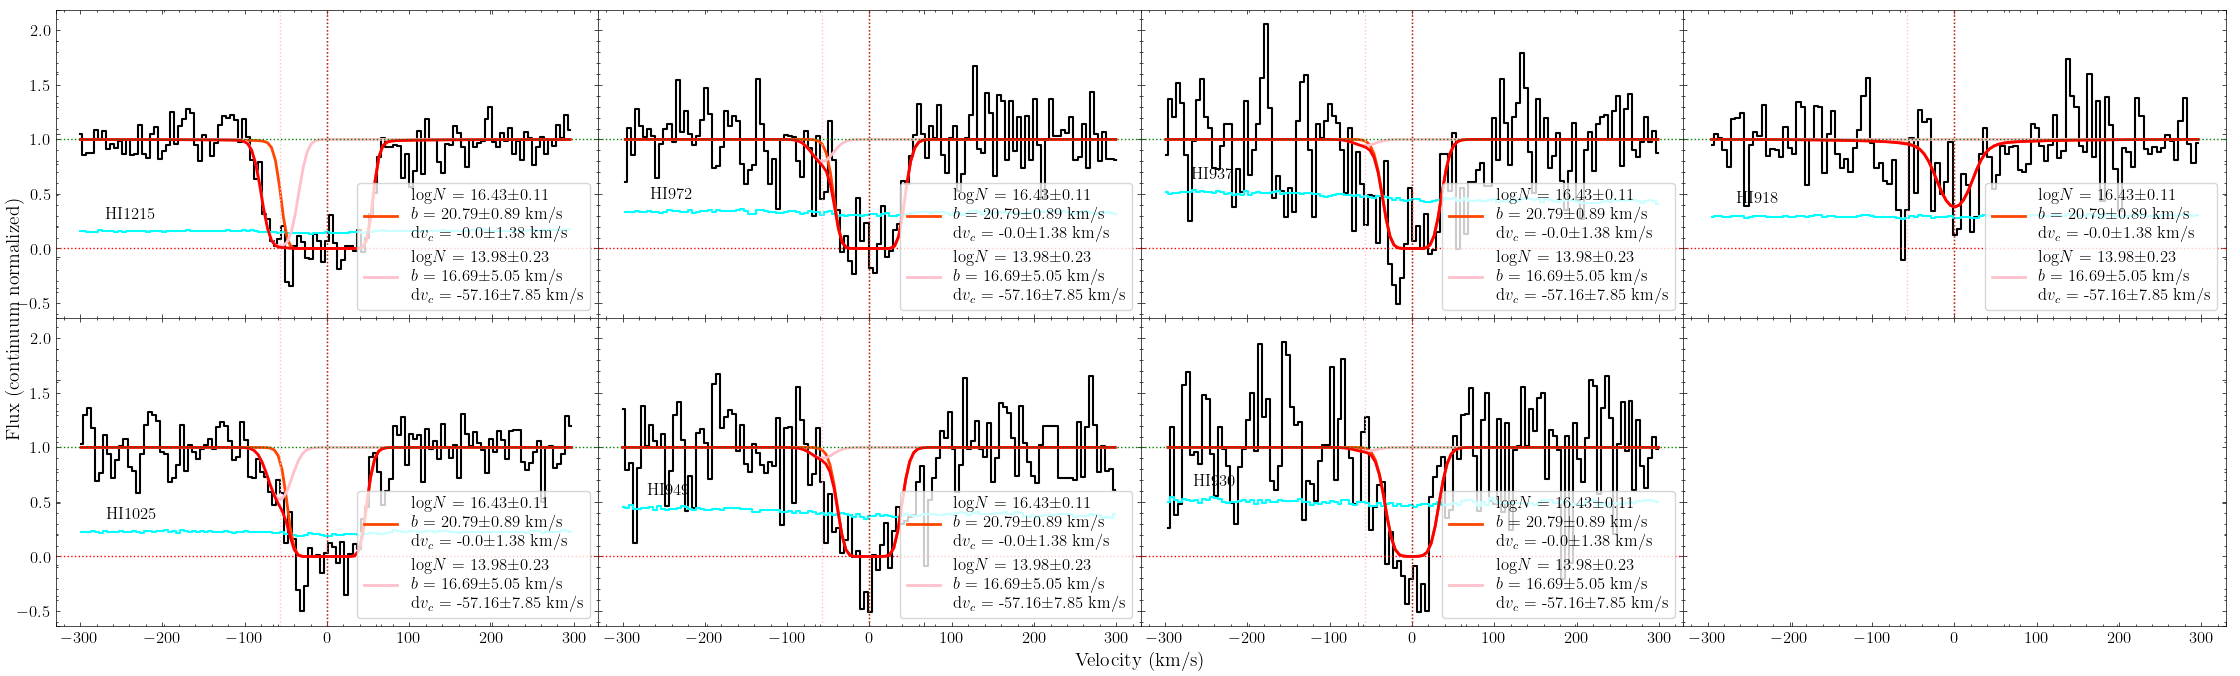

In [256]:
fig, axes = hi.plot_ion_best_fit(n_cols=4)

## z=1.09454 CIII 977

### STIS

In [257]:
ciii_977_stis = ion_transition('CIII', 977, 'C', 1.09458, 'STIS')

In [258]:
ciii_977_stis.grab_ion_transition_info()

In [259]:
ciii_977_stis.grab_ion_transition_spec(spec_fits_list)

In [260]:
ciii_977_stis.cont_norm_flux(renorm=True, v_abs_range=[-90,90], degree=1)

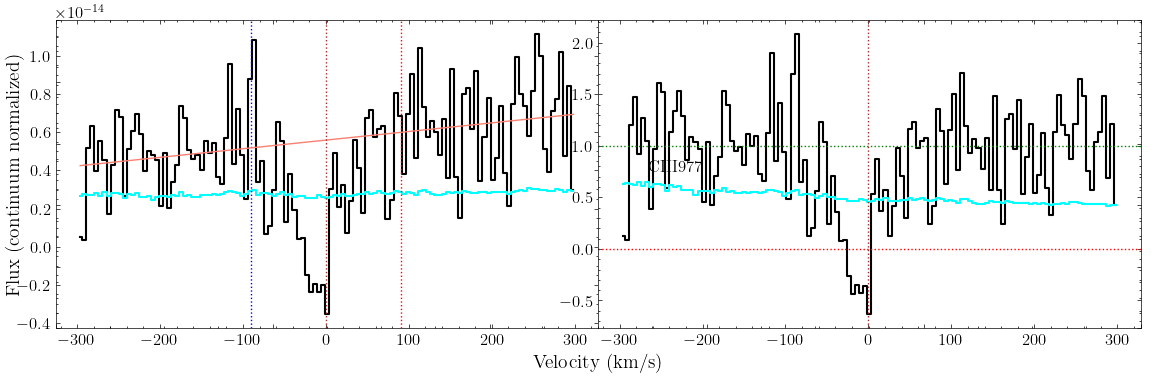

In [261]:
fig, axes = ciii_977_stis.plot_ion_transition_spec_cont()

### NUV

In [262]:
ciii_977_nuv = ion_transition('CIII', 977, 'C', 1.09458, 'NUV')

In [263]:
ciii_977_nuv.grab_ion_transition_info()

In [264]:
ciii_977_nuv.grab_ion_transition_spec(spec_fits_list)

In [265]:
ciii_977_nuv.cont_norm_flux(renorm=True, v_abs_range=[-150,90], degree=1)

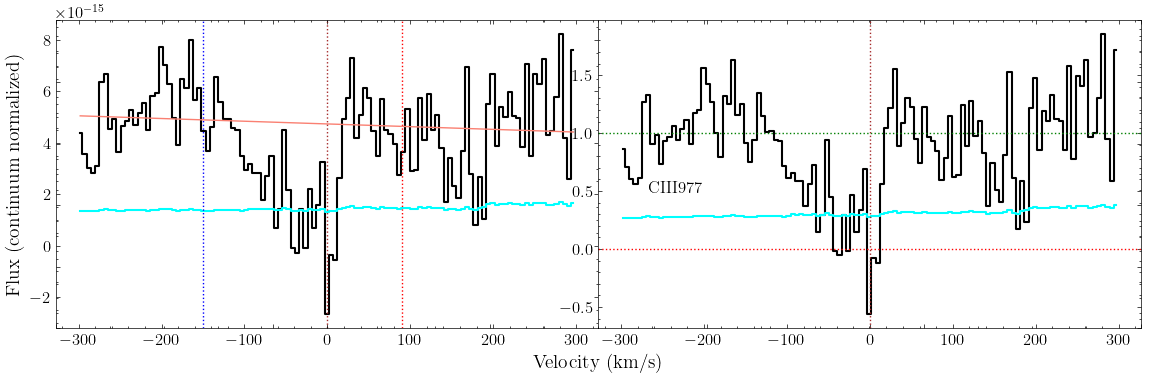

In [266]:
fig, axes = ciii_977_nuv.plot_ion_transition_spec_cont()

# Summary of wavelength offsets

In [267]:
print('FUV: ' + '{} Å'.format(delta_wav_fuv))
print('NUV: ' + '{} Å'.format(delta_wav_nuv))
print('STIS: ' + '{} Å'.format(delta_wav_stis))
print('HIRES: ' + '0 Å')

FUV: 0.027361350561960006 Å
NUV: 0.020175157458413 Å
STIS: 0.016434071712905403 Å
HIRES: 0 Å
